# <font color='blue'>Assignment: MSE-vs-MAE</font>

In the lecture, we have seen that `Mean Absolute Error` (`MAE`) is more robust to outlier compare to `Mean Square Error` (`MSE`). In this assignment, we have to be a witness to this theory. 

Although we have an intuition that it is bound to happen because the cost of outliers is much more in `MSE` compare to `MAE`. Let's implement and witness it. 

**In this assignment, you have to implement the following:**

- `Mean Square Error (MSE)`


- `Mean Absolute Error (MAE)`


- The gradient with respect to `m` and `c`, when the loss function is `MSE`


- The gradient with respect to `m` and `c`, when the loss function is `MAE`

Codes for training and visualization is already in the notebook.

## <font color='blue'>Marking Scheme</font>

#### Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Mean Square Error (MSE)</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Mean Absolute Error (MAE)</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Gradients for MSE</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Gradients for MAE</h3></td> <td><h3>10</h3></td> </tr>
    </table>
</div>


In [1]:
%matplotlib inline

In [2]:
import torch
import matplotlib.pyplot as plt

from collections import defaultdict


plt.style.use('ggplot')

torch.manual_seed(0)

In [3]:
plt.rcParams["figure.figsize"] = (15, 8)

# <font style="color:green">1. Generate Data </font>
We will generate 1000 data points for the experiment. The `x-axis` is the independent variable which has values randomly distributed between -5 to 5. We assume some values for m and c to create the data points for the dependent variable ( `y-axis` ). We also add some randomness so that the y values are different for the same x. 

Now, we have a simple dataset which has been generated using a linear model in the presence of noise. We have also converted five percent of data into outliers to observe the performance difference between MSE and MAE at the time of training. The data has been dispayed using the scatter plot.

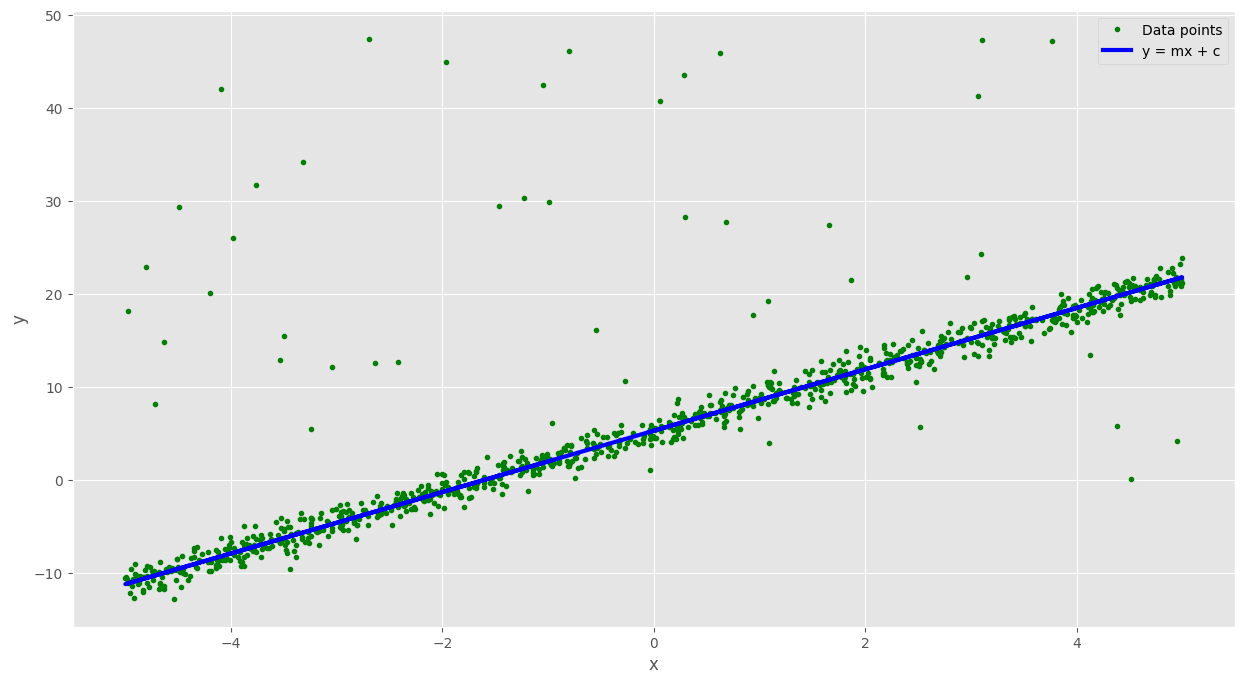

In [4]:
# Generating y = mx + c + random noise
num_data = 1000

# True values of m and c
m_line = 3.3
c_line = 5.3

# input (Generate random data between [-5,5])
x = 10 * torch.rand(num_data) - 5

# Output (Generate data assuming y = mx + c + noise)
y_label = m_line * x + c_line + torch.randn_like(x)

# Add a few outlier
num_outliers = int(0.05 * num_data)
random_index = torch.randint(num_data, (num_outliers,))
y_label[random_index] = 50 * torch.rand(len(random_index))

y = m_line * x + c_line

# Plot the generated data points 
plt.plot(x, y_label, '.', color='g', label="Data points")
plt.plot(x, y, color='b', label='y = mx + c', linewidth=3)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

# <font style="color:green">2. Problem Formulation</font>

The goal is to predict $y$ given some value of $x$. To do this we will fit a line that goes through the data points $(x_i, y_i)$. The equation for such a line is 

$$
y = mx + c
$$

We have a set of data points $(x_i, y_i)$, and they should all satisfy the equation above. i.e., 

$$
y_i = m x_i + c
$$

Unless we have perfect data with no noise, even the best $m$ and $c$ we can find will not perfectly fit the data. So, we will have an **error** or a **residual** given by

$$
e_i = (y_i - m x_i -c) 
$$

We want to find a value of $m$ and $c$ that minimizes the error above. Positive or negative values of error are equally bad for us. So, we are interested in minimizing the square or absolute of the error above. We will see the mean square error (`MSE`) and mean absolute error (`MAE`) and their gradients with respect to m and c. 

# <font style="color:green">3. Loss Functions and their Gradients wrt Learning Parameters.</font>

We need a loss function that can be optimized using gradient descent and updating learnable parameters. Here, we will use two types of loss functions and see which is performing better in the case of outliers in the training data. 


## <font style="color:green">3.1. Mean Square Error (MSE)</font>

**The `mean squared error (MSE)` function which is given by:**

$$
l_{mse} = \frac{1}{N}\sum^N_{i=1}(y_i - m x_i -c)^2 \\
$$

**Take partial derivatives w.r.t `m` and `c` respectively:**

$$
\begin{align}
\frac{\partial l_{mse}}{\partial m}  &= -\frac{2}{N} \sum^N_{i=1} x_i(y_i - m x_i - c) \\
\frac{\partial l_{mse}}{\partial c}  &= -\frac{2}{N} \sum^N_{i=1} (y_i - m x_i - c) \\
\end{align}
$$

To follow the slope of the curve, we need to move `m` in the direction of negative gradient. However, we need to control the rate at which we go down the slope so that we do not overshoot the minimum. So we use a parameter $\lambda$ called the `learning rate`. 

**Update rule of `m` and `c` using gradient descent:**

$$
\begin{align}
m_k &= m_{k-1} - \lambda \frac{\partial l_{mse}}{\partial m} \\
c_k &= c_{k-1} - \lambda \frac{\partial l_{mse}}{\partial c} \\ 
\end{align}
$$


## <font style="color:green">3.2. Mean Absolute Error (MAE)</font>

**The `mean absolute error (MAE)` function which is given by:**

$$
l_{mae} = \frac{1}{N}\sum^N_{i=1}|y_i - m x_i -c|
$$

**The above function can be re-written as the following:**

$$
l_{mae} = \frac{1}{N}\sum^N_{i=1}sign(y_i - m x_i -c)\cdot (y_i - m x_i -c)\\
$$

Where,

\begin{equation}
  sign(\alpha) =
    \begin{cases}
      1 & \text{if  $\alpha > 0$}\\
      -1 & \text{if  $\alpha < 0$}\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}

**Take partial derivatives w.r.t `m` and `c` respectively:**

$$
\begin{align}
\frac{\partial l_{mae}}{\partial m}  &= \frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c)\cdot (- x_i) \\
                                     &= -\frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c)\cdot x_i \\
\frac{\partial l_{mae}}{\partial c}  &= \frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c)\cdot (-1) \\
                                     &= -\frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c) \\
\end{align}
$$

**Update rule of `m` and `c` using gradient descent:**

$$
\begin{align}
m_k &= m_{k-1} - \lambda \frac{\partial l_{mae}}{\partial m} \\
c_k &= c_{k-1} - \lambda \frac{\partial l_{mae}}{\partial c} \\ 
\end{align}
$$



# <font style="color:green">4. Implementation</font>

## <font style="color:green">4.1. Mean Square Error (MSE) [5 Points]</font>

In [8]:
def MSE_loss(inputs, label, m, c):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    # Mean square error (loss)
    loss = None
    
    ###
    ### YOUR CODE HERE
    ###
    N = len(inputs)
    X = inputs
    Y = label
    
    e = Y - m * X - c

    loss = torch.sum(torch.mul(e,e)) / N
    
    return loss
    

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Mean square error (MSE): 15.95
```

In [9]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

mse_loss = MSE_loss(X, Y, m, c)

print('Mean square error (MSE): {0:.2f}'.format(mse_loss))

Mean square error (MSE): 15.95


In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:green">4.2. Mean Absolute Error (MAE) [5 Points]</font>

In [11]:
def MAE_loss(inputs, label, m, c):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    # Mean absolute error (loss)
    loss = None
    
    ###
    ### YOUR CODE HERE
    ###
    N = len(inputs)
    X = inputs
    Y = label
    
    e = Y - m * X - c

    loss = torch.sum(torch.abs(e)) / N
    
    return loss
    

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Mean absolute error (MAE): 3.70
```

In [12]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

mae_loss = MAE_loss(X, Y, m, c)

print('Mean absolute error (MAE): {0:.2f}'.format(mae_loss))

Mean absolute error (MAE): 3.70


In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:green">4.3. Gradients for MSE [10 Points]</font>

In [17]:
def gradient_wrt_m_and_c_mse(inputs, labels, m, c):
    
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    # gradient w.r.t to m is g_m 
    g_m = None
    
    # gradient w.r.t to c is g_c
    g_c = None
    
    ###
    ### YOUR CODE HERE
    ###
    N = len(inputs)
    X = inputs
    Y = labels

    g_m = X * (Y - m * X - c)
    g_m = torch.sum(g_m) * -2.0 / N

    g_c = (Y - m * X - c)
    g_c = torch.sum(g_c) * -2.0 / N

    return g_m, g_c

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Gradient wrt m (for MSE): -18.66
Gradient wrt c (for MSE): -3.33
```

In [18]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

gm, gc = gradient_wrt_m_and_c_mse(X, Y, m, c)

print('Gradient wrt m (for MSE): {0:.2f}'.format(gm))
print('Gradient wrt c (for MSE): {0:.2f}'.format(gc))    

Gradient wrt m (for MSE): -18.66
Gradient wrt c (for MSE): -3.33


In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [20]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:green">4.4. Gradients for MAE [10 Points]</font>

In [33]:
def gradient_wrt_m_and_c_mae(inputs, labels, m, c):
    
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    # gradient w.r.t to m is g_m 
    g_m = None
    
    # gradient w.r.t to c is g_c
    g_c = None
    
    ###
    ### YOUR CODE HERE
    ###
    N = len(inputs)
    X = inputs
    Y = labels

    g_m = torch.sign(Y - m * X - c) * X
    g_m = torch.sum(g_m) * -1.0 / N

    g_c = torch.sign(Y - m * X - c)
    g_c = torch.sum(g_c) * -1.0 / N
    
    return g_m, g_c
    

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Gradient wrt m (for MAE): -2.25
Gradient wrt c (for MAE): -0.33
```

In [35]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

gm, gc = gradient_wrt_m_and_c_mae(X, Y, m, c)

print('Gradient wrt m (for MAE): {0:.2f}'.format(gm))
print('Gradient wrt c (for MAE): {0:.2f}'.format(gc))    

Gradient wrt m (for MAE): -2.25
Gradient wrt c (for MAE): -0.33


In [36]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [37]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [38]:
def update_m_and_c(m, c, g_m, g_c, lr):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    g_m = gradient w.r.t to m
    c_m = gradient w.r.t to c
    '''
    updated_m = m -  lr * g_m
    updated_c = c - lr * g_c
    
    return updated_m, updated_c

## <font style="color:green">4.5. Training</font>

**Function for loss plot.**

In [39]:
def plot_loss(loss):
    fig = plt.figure()
    
    plt.subplot(1, 2, 1)
    plt.plot(range(len(loss[0])), loss[0], color='k')
    
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.title('MSE Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss[1])), loss[1], color='r')
    
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.title('MAE Loss')
    plt.show()
    
    return

**Function for display intermediate training.**

In [41]:
def display_training(X, Y_origin, Y_label, loss, m, c, iteration):
    print('Iteration: {}, \nLoss_mse: {:.3f}, m_mse: {:.3f}, c_mse: {:.3f}\nLoss_mae: {:.3f}, m_mae: {:.3f},' 
          'c_mae: {:.3f}'.format(iteration, loss[0][-1], m[0], c[0], loss[1][-1], m[1], c[1]))
    
    # Prediction for trained with MSE loss
    y_pred_mse = m[0] * X + c[0]
    
    # Prediction for trained with MAE loss
    y_pred_mae = m[1] * X + c[1]
    
    # plots
    
    # points plot
    plt.plot(X, Y_label, '.', color='g')
    
    # Line for which data is generated
    plt.plot(X, Y_origin, color='b', label='Line corresponding to m={0:.2f}, c={1:.2f}'.
             format(m_line, c_line), linewidth=3)
    
    # Line learned with MSE loss
    plt.plot(X, y_pred_mse, color='k', label='Line corresponding to m_mse={0:.2f}, c_learned={1:.2f}'.
             format(m[0], c[0]), linewidth=3)
    
    # Line learned with MSE loss
    plt.plot(X, y_pred_mae, color='r', label='Line corresponding to m_mae={0:.2f}, c_learned={1:.2f}'.
             format(m[1], c[1]), linewidth=3)
    
    
    plt.title("Iteration : {}".format(iteration))
    plt.legend()

    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()
    
    return

**The training function**

In [42]:
def train(inputs, labels, labels_origin, initial_m, initial_c, grad_fun_m_c_list, loss_fun_list, lr=0.01, 
          batch_size=10, epoch=10, display_count=20):
    
    loss = dict()
    m = dict()
    c = dict()
    
    for i in range(len(grad_fun_m_c_list)):
        loss[i] = []
        m[i] = initial_m
        c[i] = initial_c
        
    num_batches = int(len(inputs)/batch_size)
    
    for i in range(epoch):
        
        shuffle_indices = torch.randint(0, len(inputs), (len(inputs),))
        
        for j in range(num_batches):
            
            X = inputs[shuffle_indices[j*batch_size:j*batch_size+batch_size]]
            Y = labels[shuffle_indices[j*batch_size:j*batch_size+batch_size]]
            
            for k, grad_m_c in enumerate(grad_fun_m_c_list):
                g_m, g_c = grad_m_c(X, Y, m[k], c[k])
                
                m[k], c[k] = update_m_and_c(m[k], c[k], g_m, g_c, lr)
                l = loss_fun_list[k](inputs, labels, m[k], c[k])
                loss[k].append(l)
            
            if j % display_count == 0:
                iteration = i * num_batches + j
                display_training(inputs, labels_origin, labels, loss, m, c, iteration)
                
    final_iteration = (epoch-1) * num_batches + num_batches - 1
                
    return m, c, loss, final_iteration

**Training.**

Iteration: 0, 
Loss_mse: 69.450, m_mse: 2.069, c_mse: 1.032
Loss_mae: 5.745, m_mae: 2.000,c_mae: 1.004


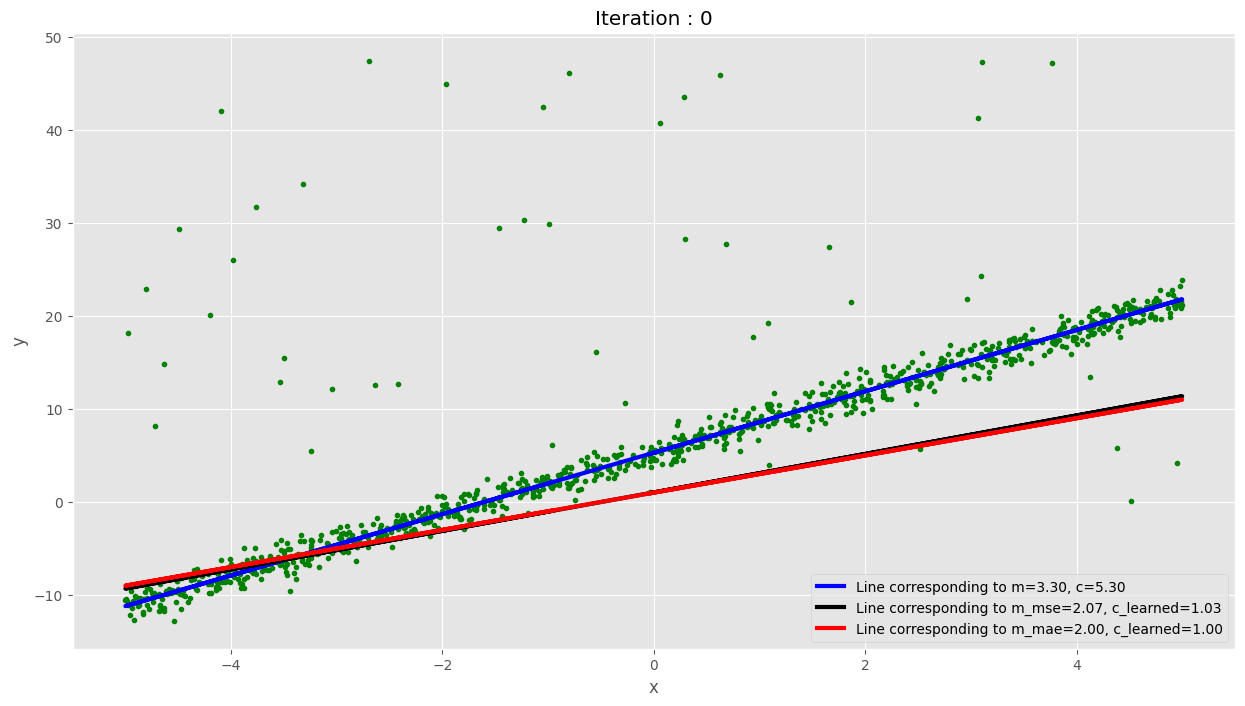

Iteration: 40, 
Loss_mse: 46.619, m_mse: 2.833, c_mse: 2.710
Loss_mae: 5.425, m_mae: 2.202,c_mae: 1.142


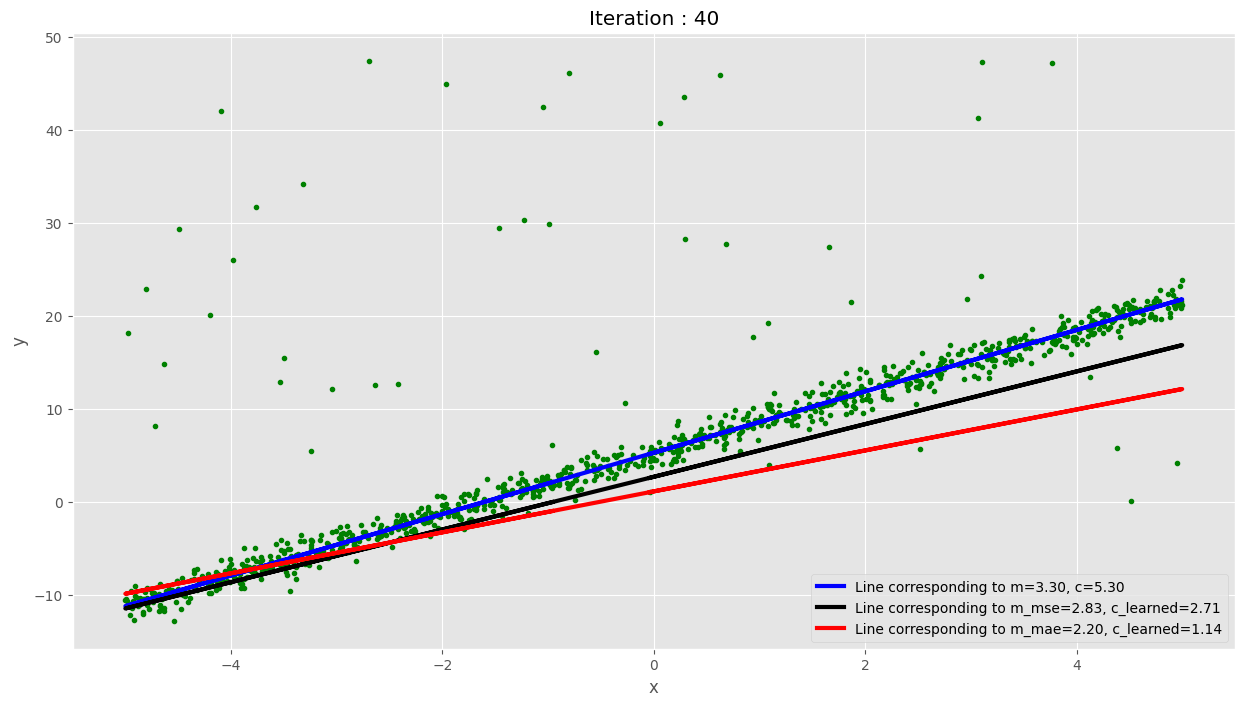

Iteration: 80, 
Loss_mse: 38.842, m_mse: 3.075, c_mse: 3.956
Loss_mae: 5.160, m_mae: 2.365,c_mae: 1.306


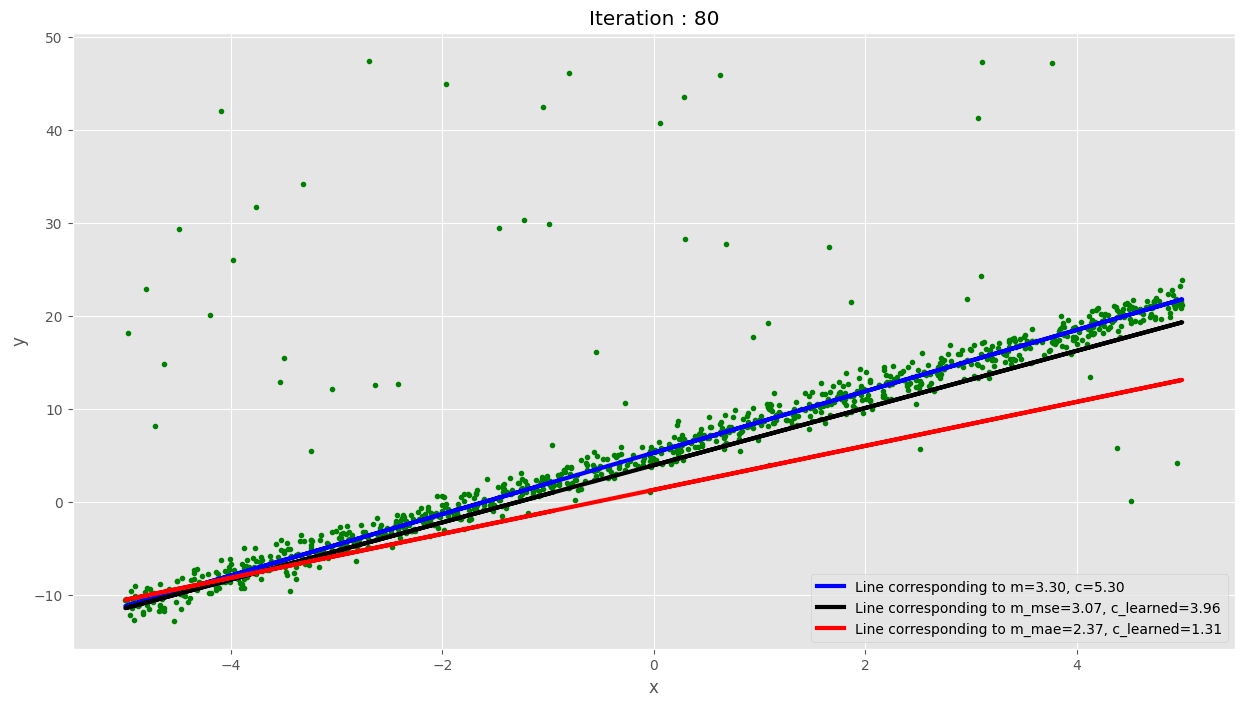

Iteration: 100, 
Loss_mse: 37.115, m_mse: 2.917, c_mse: 4.412
Loss_mae: 5.063, m_mae: 2.400,c_mae: 1.396


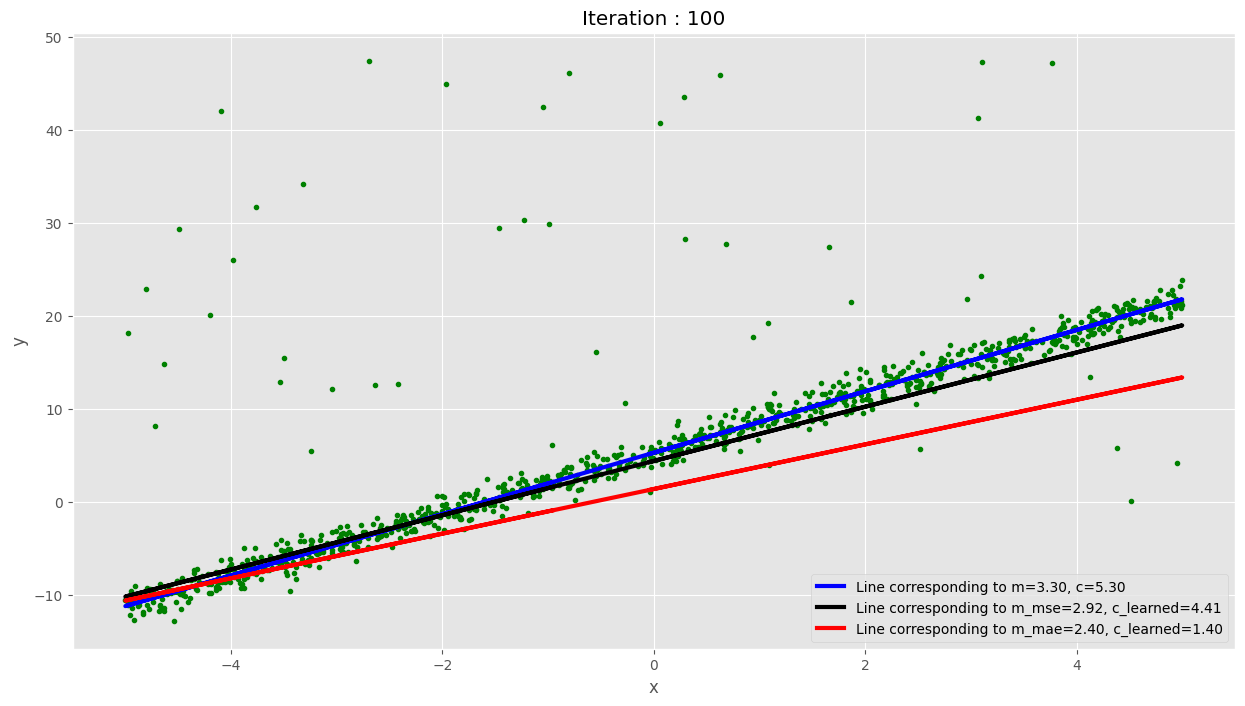

Iteration: 140, 
Loss_mse: 34.904, m_mse: 3.041, c_mse: 5.078
Loss_mae: 4.861, m_mae: 2.502,c_mae: 1.568


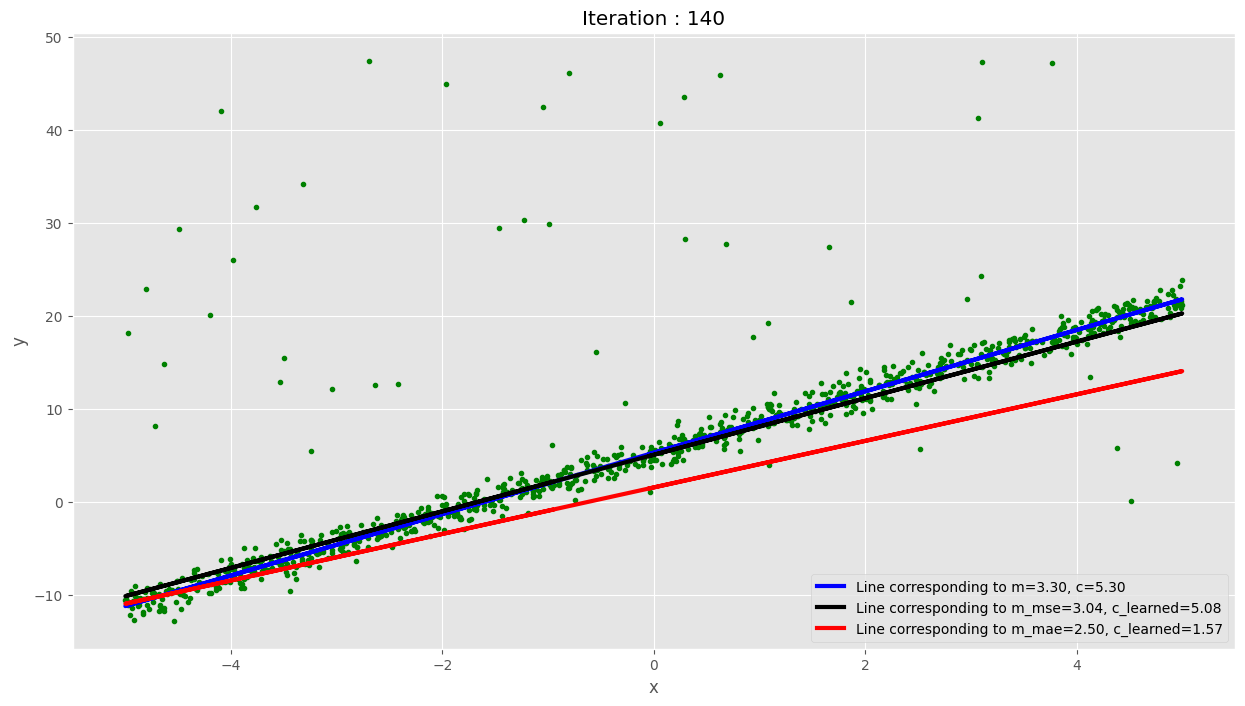

Iteration: 180, 
Loss_mse: 33.965, m_mse: 3.095, c_mse: 5.578
Loss_mae: 4.688, m_mae: 2.540,c_mae: 1.746


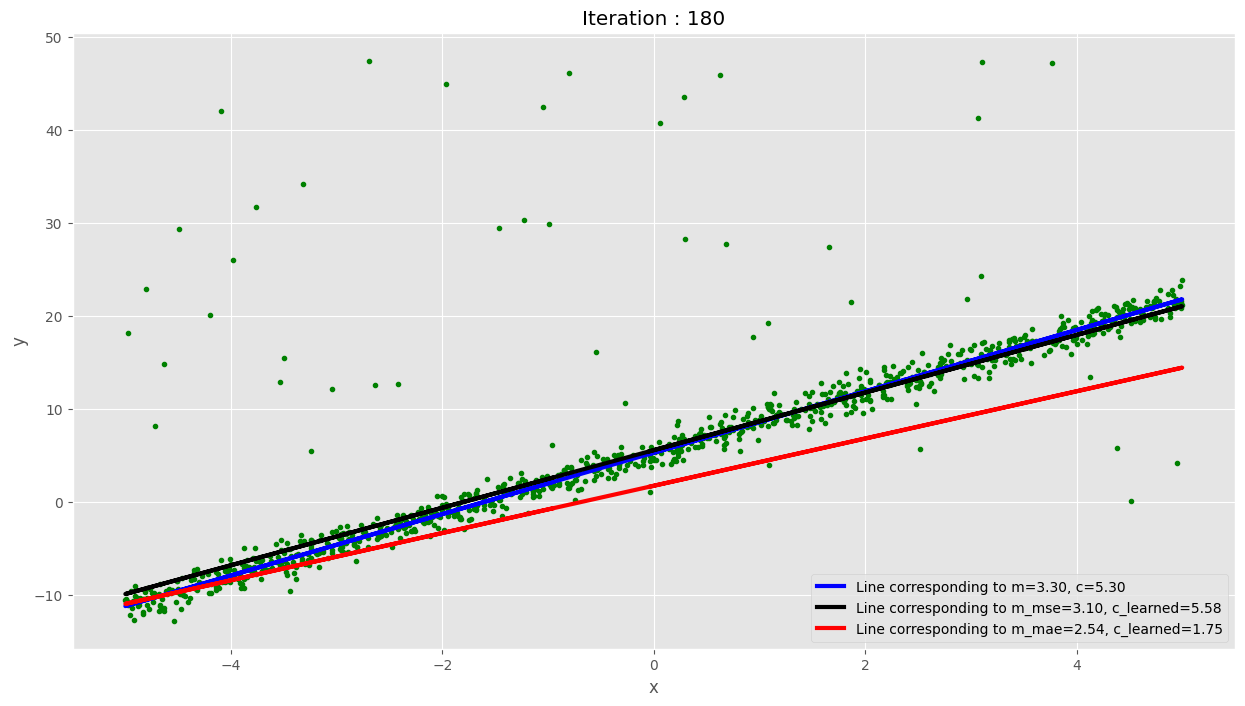

Iteration: 200, 
Loss_mse: 33.735, m_mse: 3.020, c_mse: 5.774
Loss_mae: 4.617, m_mae: 2.534,c_mae: 1.832


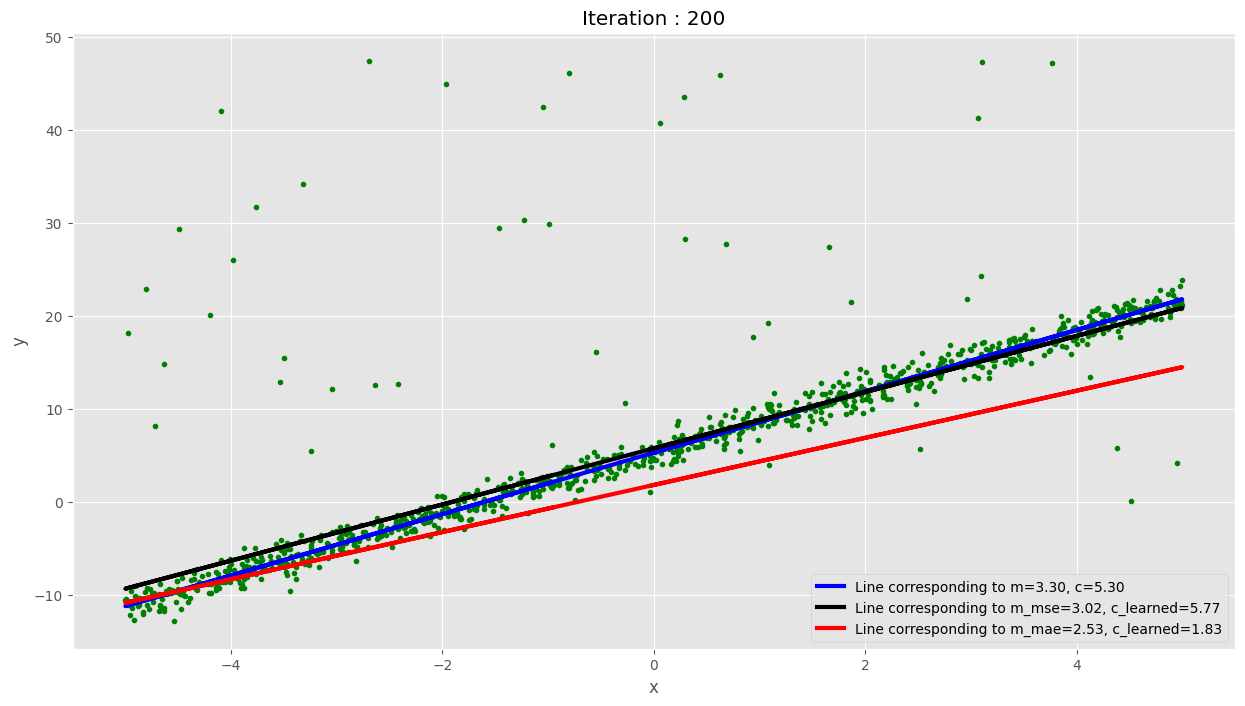

Iteration: 240, 
Loss_mse: 33.606, m_mse: 3.049, c_mse: 5.909
Loss_mae: 4.416, m_mae: 2.647,c_mae: 2.005


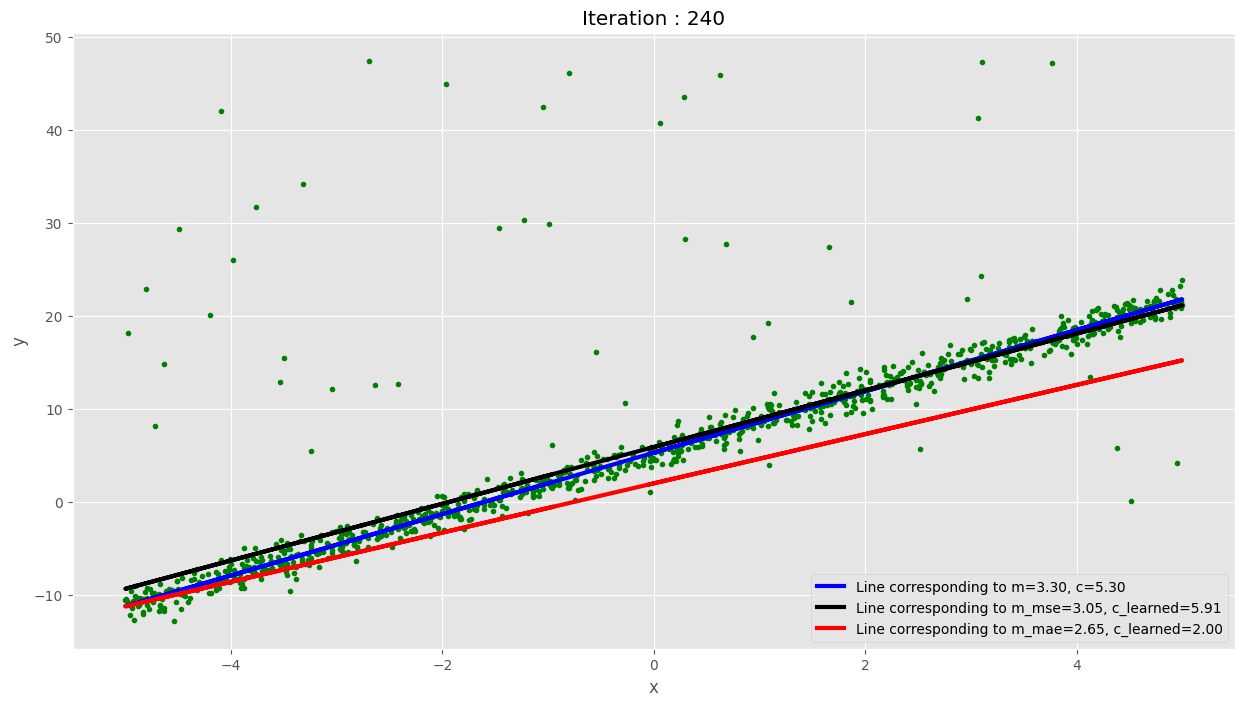

Iteration: 280, 
Loss_mse: 33.539, m_mse: 3.075, c_mse: 6.019
Loss_mae: 4.226, m_mae: 2.732,c_mae: 2.185


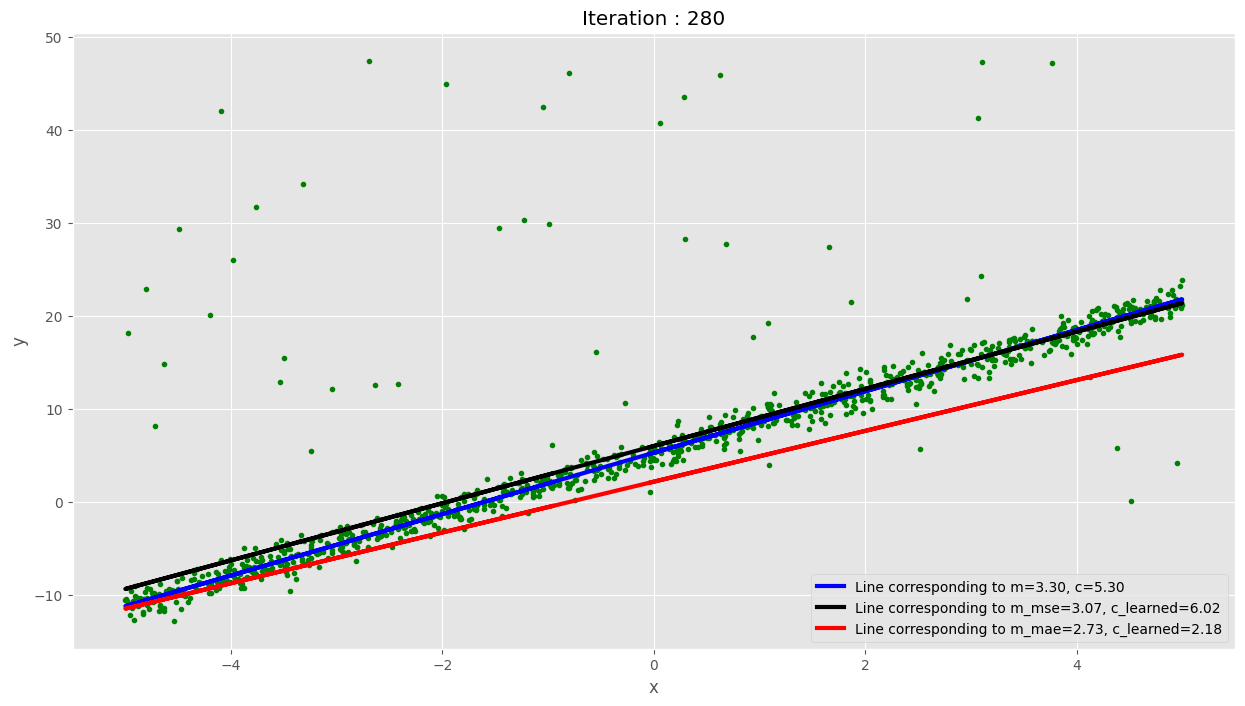

Iteration: 300, 
Loss_mse: 33.981, m_mse: 3.292, c_mse: 6.059
Loss_mae: 4.138, m_mae: 2.762,c_mae: 2.272


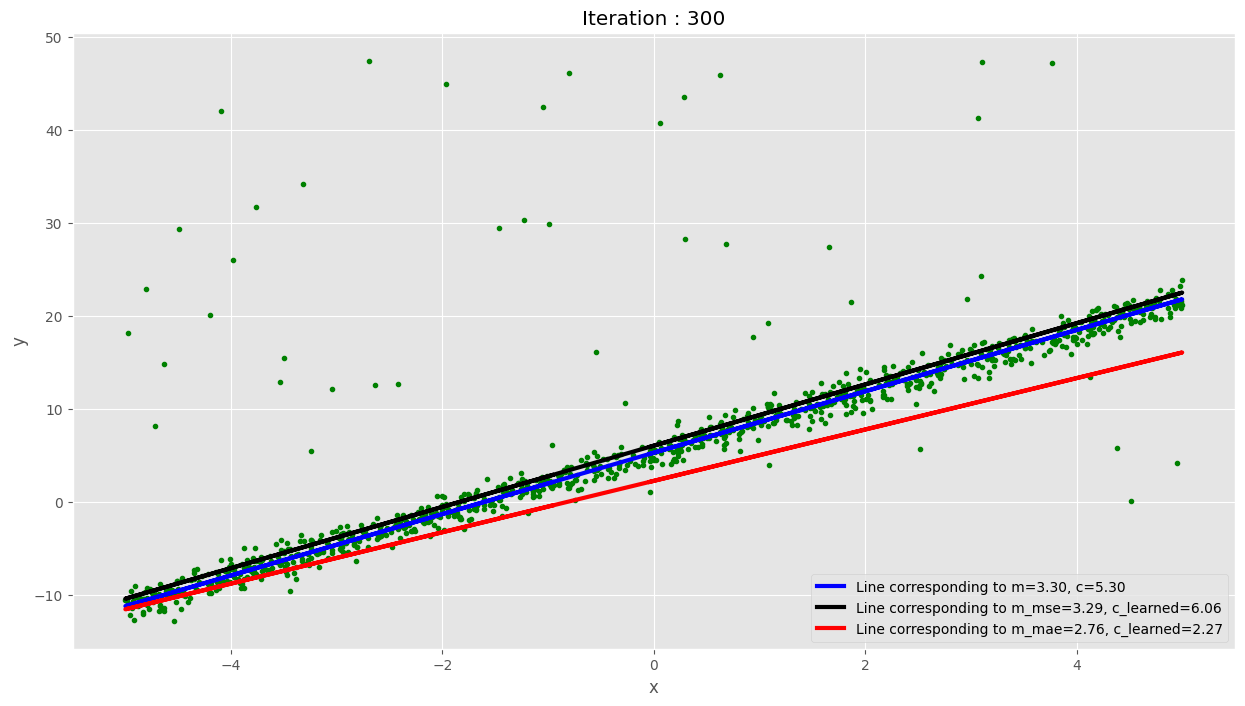

Iteration: 340, 
Loss_mse: 34.140, m_mse: 2.782, c_mse: 6.192
Loss_mae: 3.969, m_mae: 2.779,c_mae: 2.455


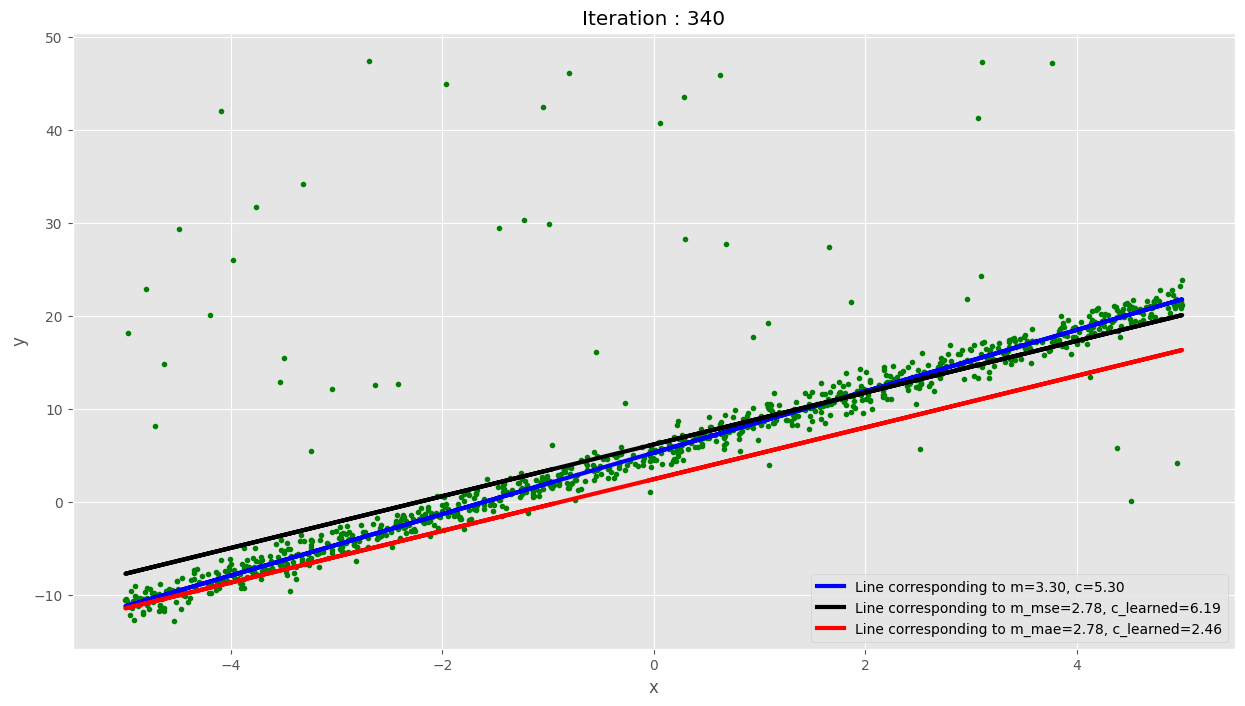

Iteration: 380, 
Loss_mse: 33.662, m_mse: 2.923, c_mse: 6.102
Loss_mae: 3.785, m_mae: 2.876,c_mae: 2.627


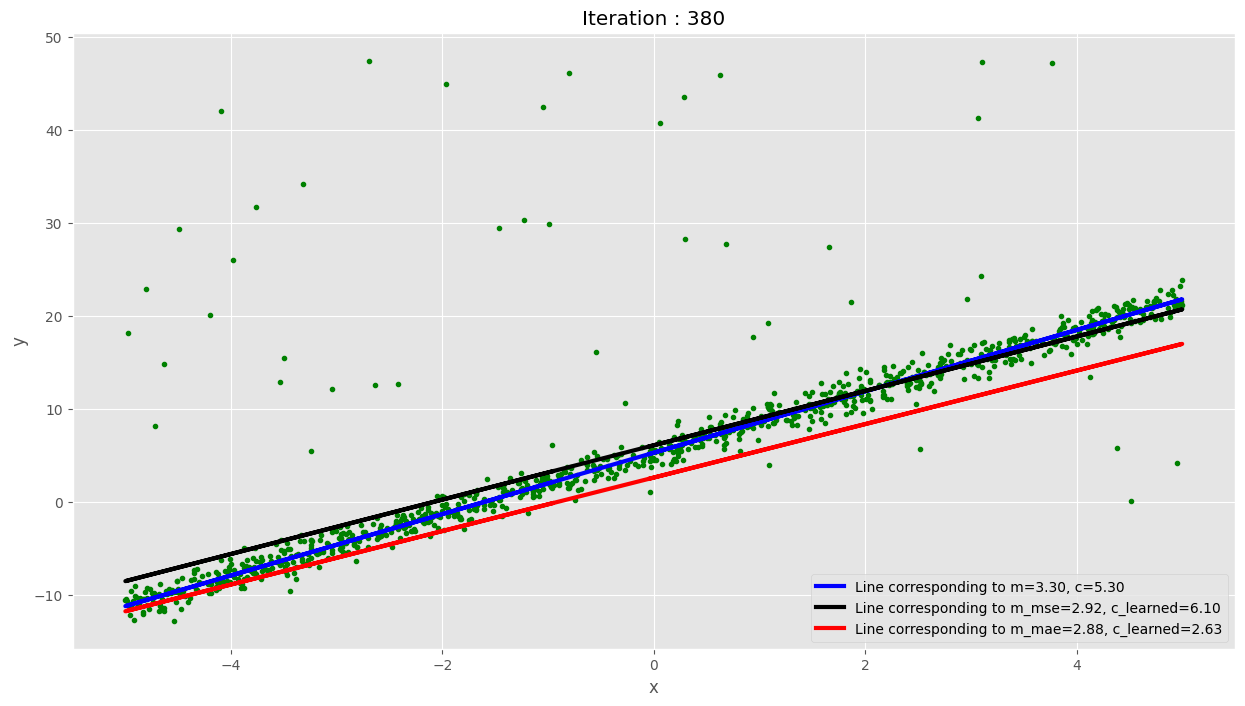

Iteration: 400, 
Loss_mse: 33.545, m_mse: 2.974, c_mse: 6.172
Loss_mae: 3.696, m_mae: 2.899,c_mae: 2.719


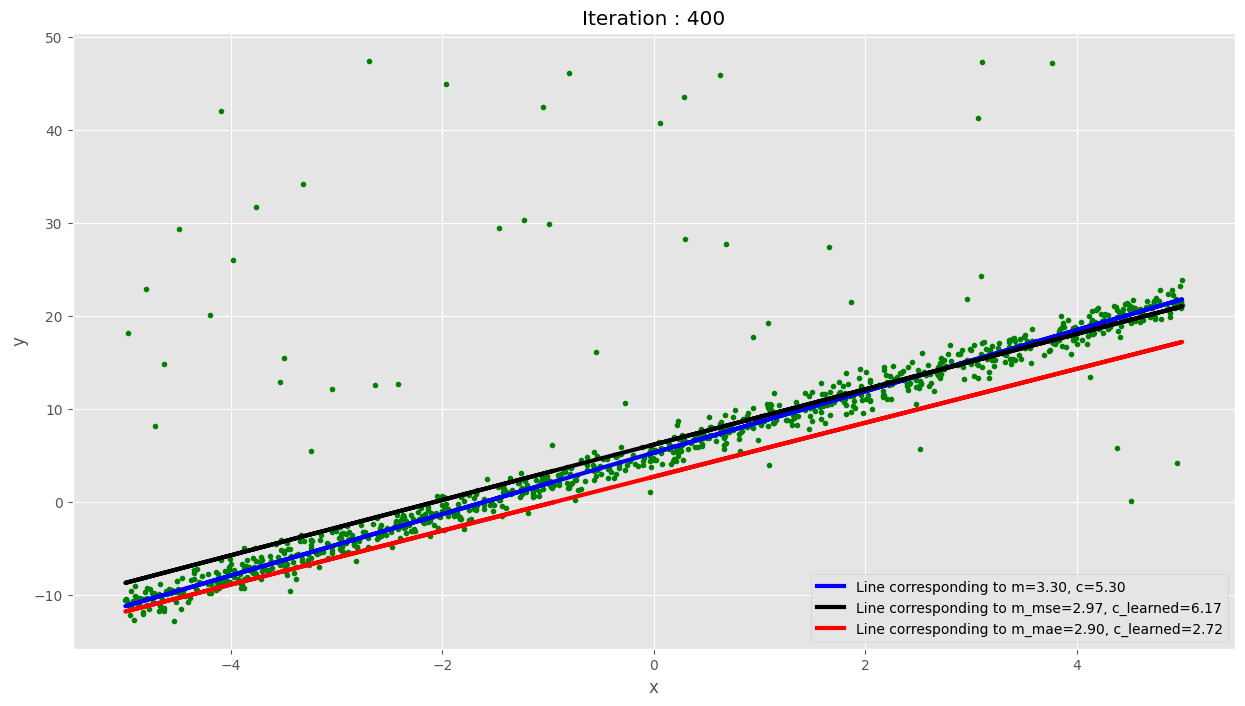

Iteration: 440, 
Loss_mse: 33.904, m_mse: 2.835, c_mse: 6.272
Loss_mae: 3.532, m_mae: 2.896,c_mae: 2.902


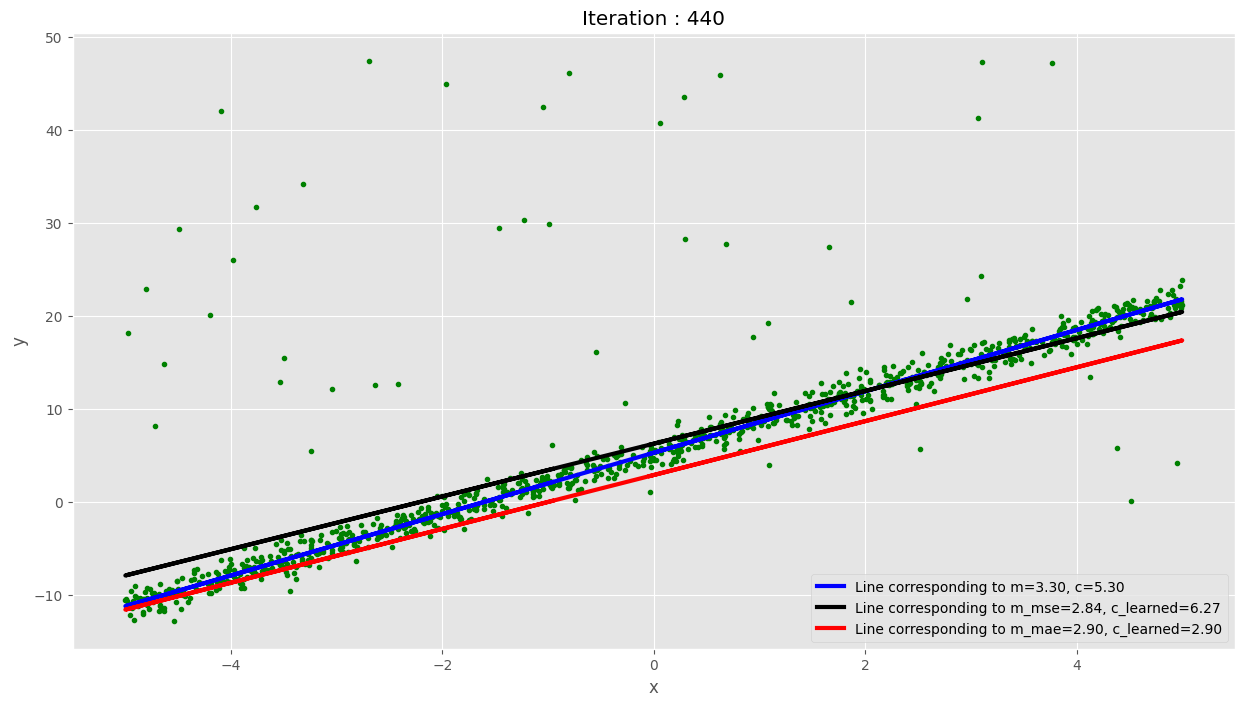

Iteration: 480, 
Loss_mse: 33.479, m_mse: 3.088, c_mse: 6.287
Loss_mae: 3.345, m_mae: 2.970,c_mae: 3.086


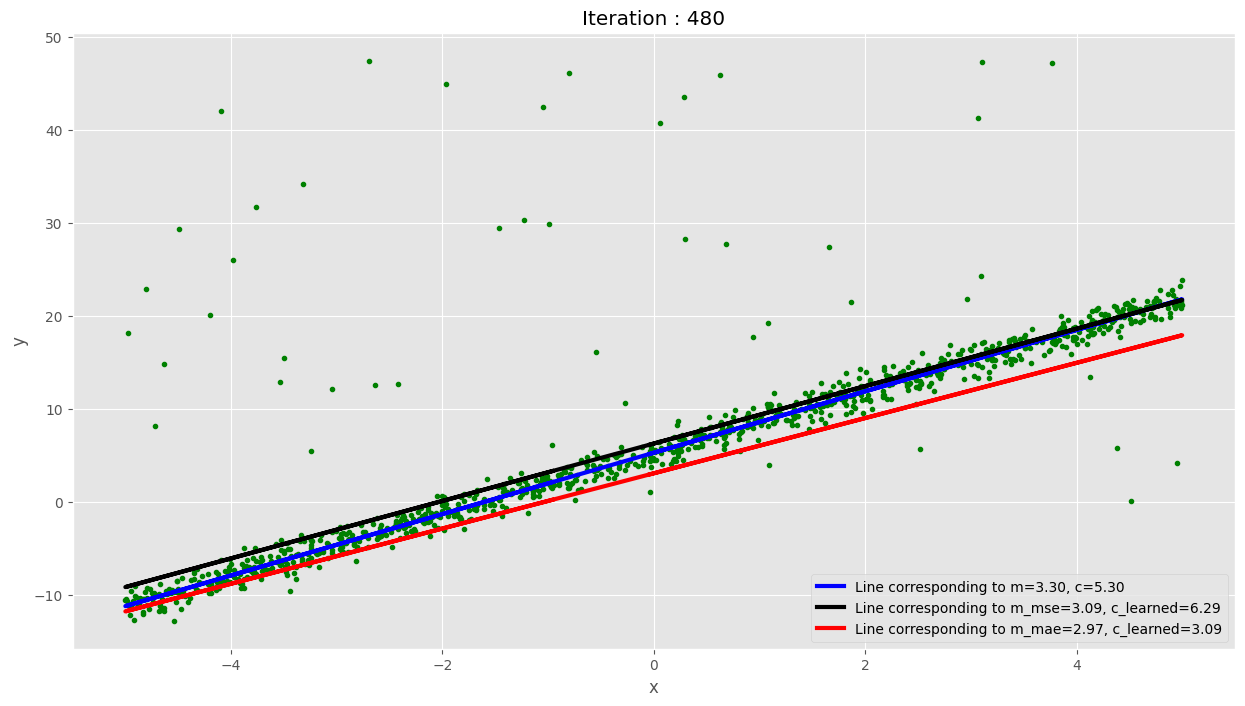

Iteration: 500, 
Loss_mse: 33.601, m_mse: 2.942, c_mse: 6.371
Loss_mae: 3.262, m_mae: 2.975,c_mae: 3.177


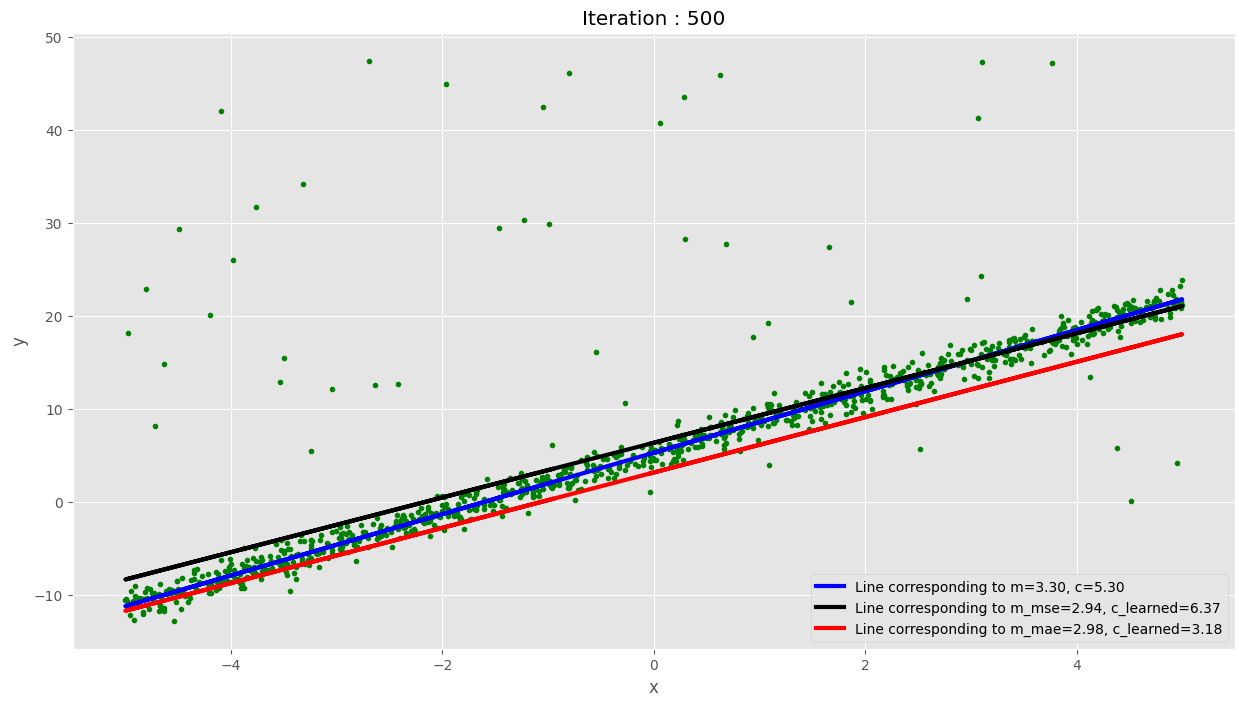

Iteration: 540, 
Loss_mse: 33.598, m_mse: 3.181, c_mse: 6.291
Loss_mae: 3.110, m_mae: 2.970,c_mae: 3.352


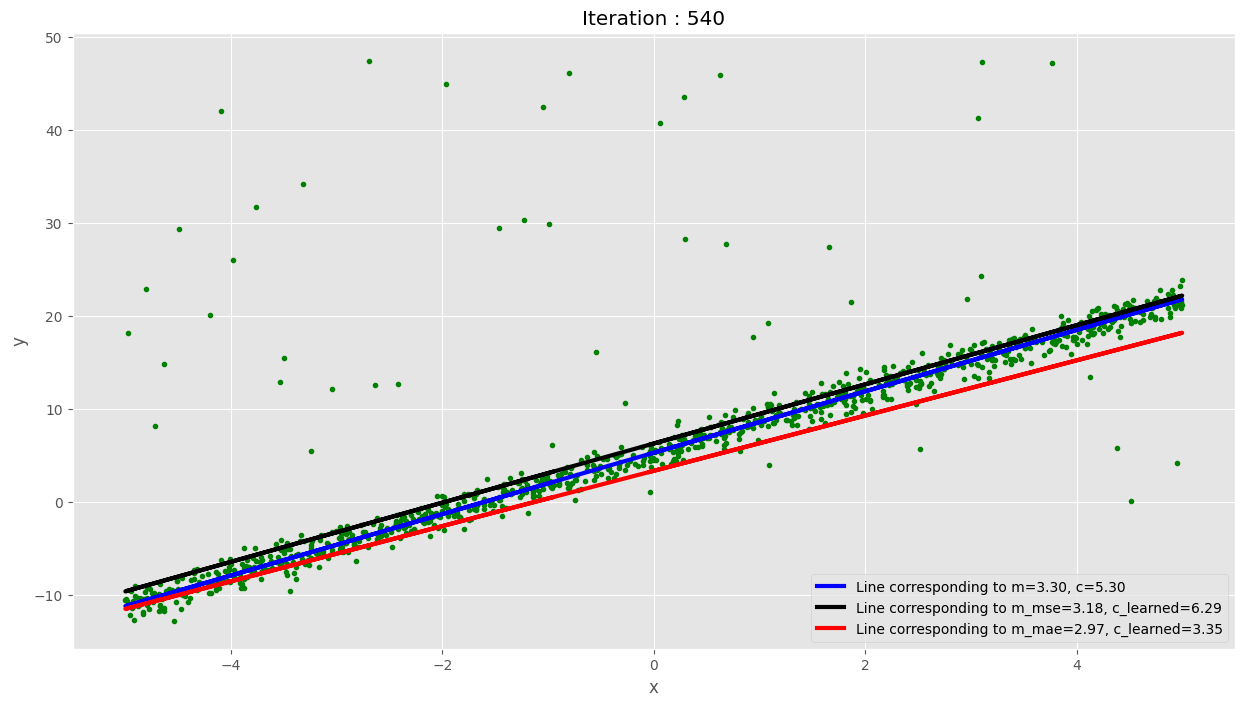

Iteration: 580, 
Loss_mse: 33.786, m_mse: 2.870, c_mse: 6.202
Loss_mae: 2.946, m_mae: 3.016,c_mae: 3.521


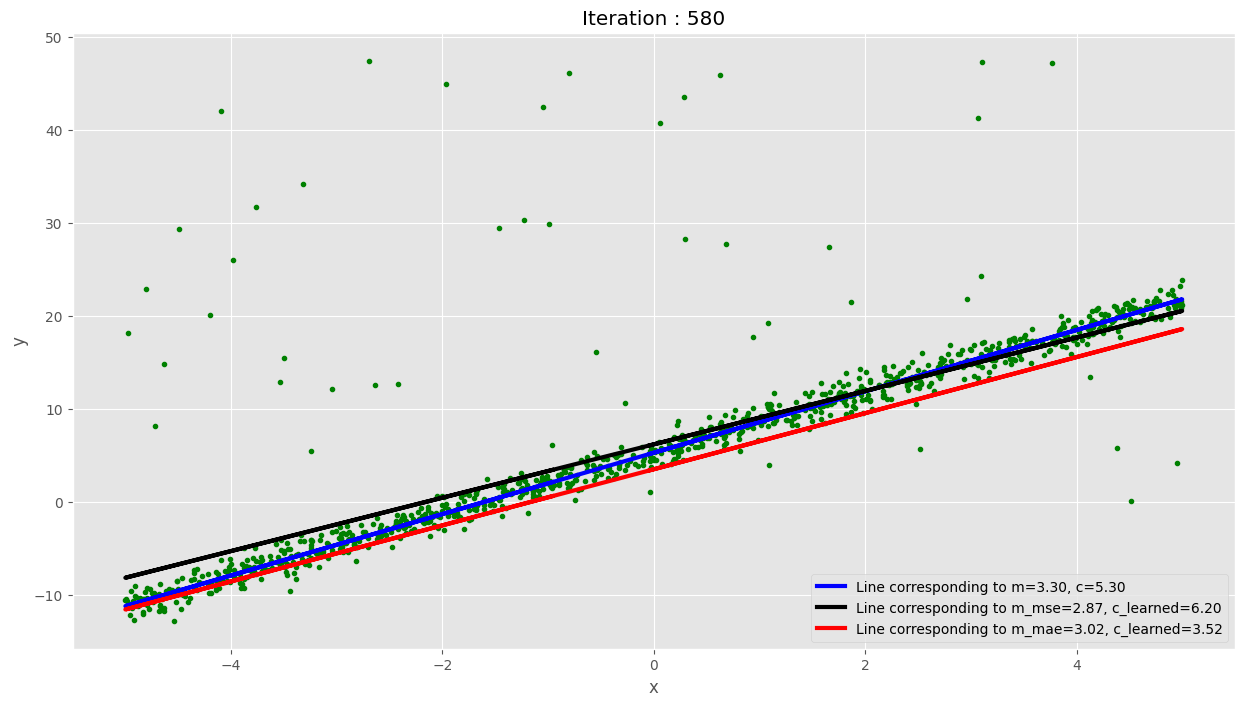

Iteration: 600, 
Loss_mse: 33.490, m_mse: 3.097, c_mse: 6.201
Loss_mae: 2.863, m_mae: 3.046,c_mae: 3.605


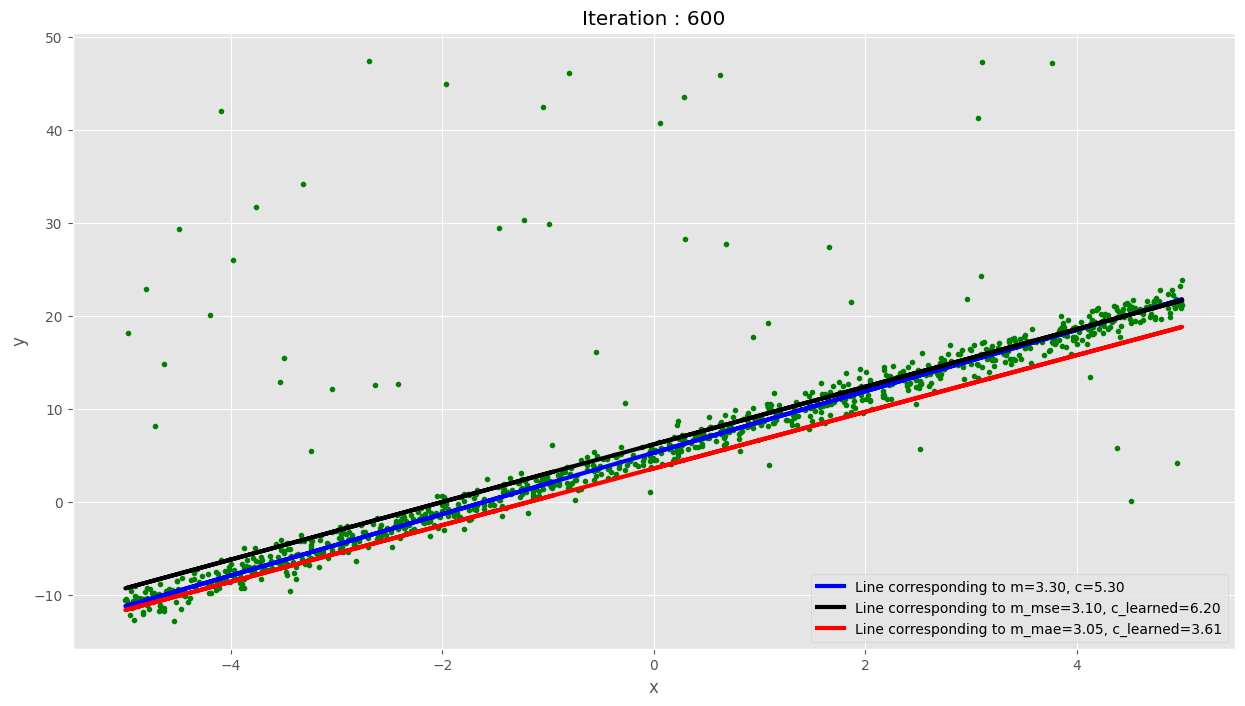

Iteration: 640, 
Loss_mse: 34.106, m_mse: 3.330, c_mse: 6.182
Loss_mae: 2.694, m_mae: 3.098,c_mae: 3.783


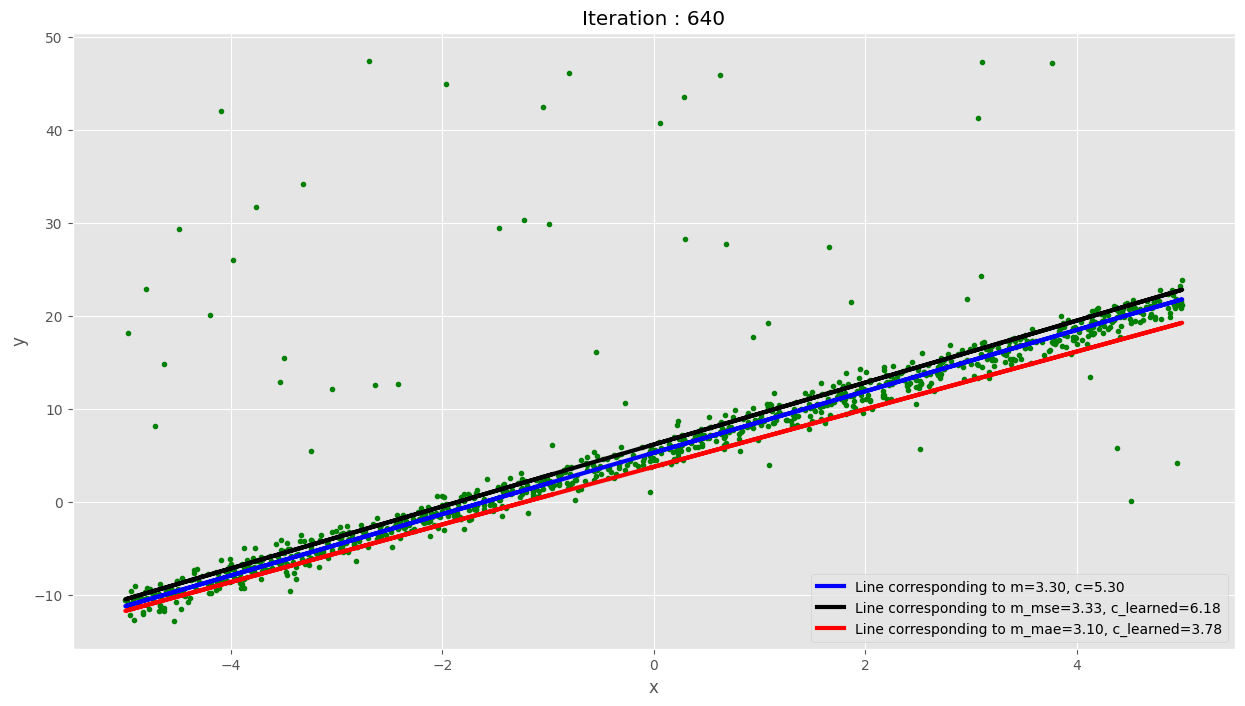

Iteration: 680, 
Loss_mse: 33.522, m_mse: 2.993, c_mse: 6.165
Loss_mae: 2.540, m_mae: 3.163,c_mae: 3.946


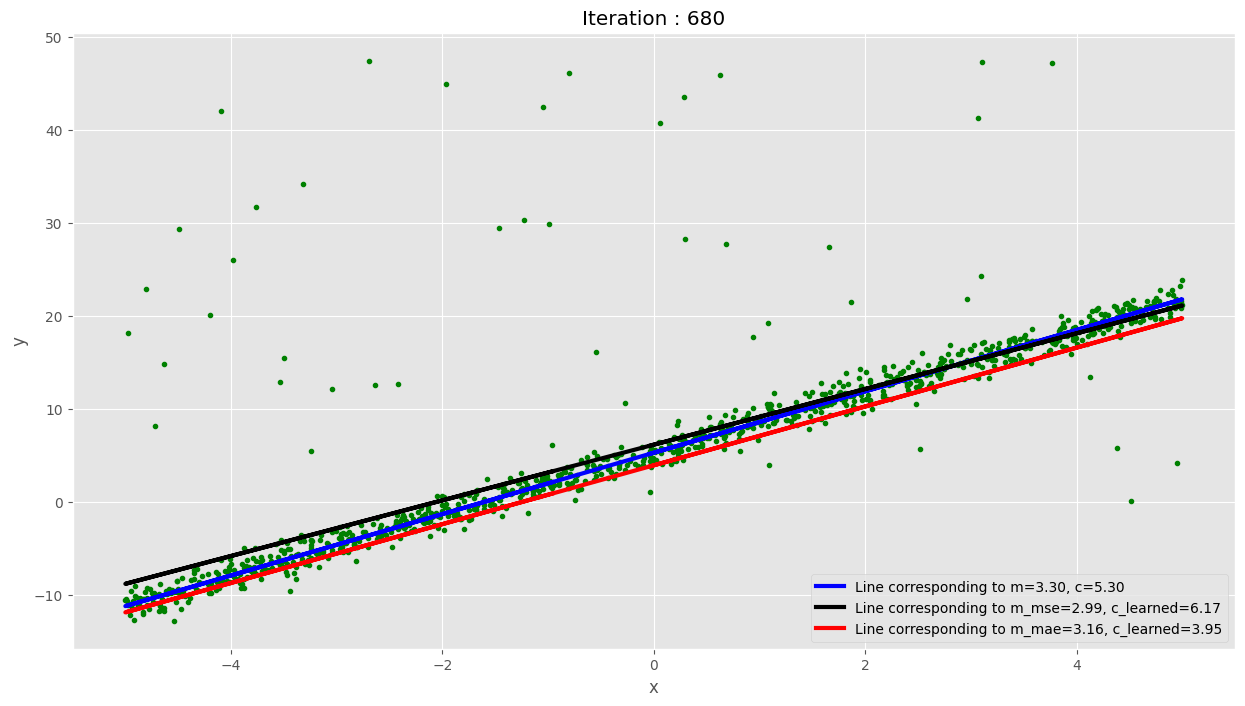

Iteration: 700, 
Loss_mse: 33.830, m_mse: 3.249, c_mse: 6.047
Loss_mae: 2.470, m_mae: 3.189,c_mae: 4.025


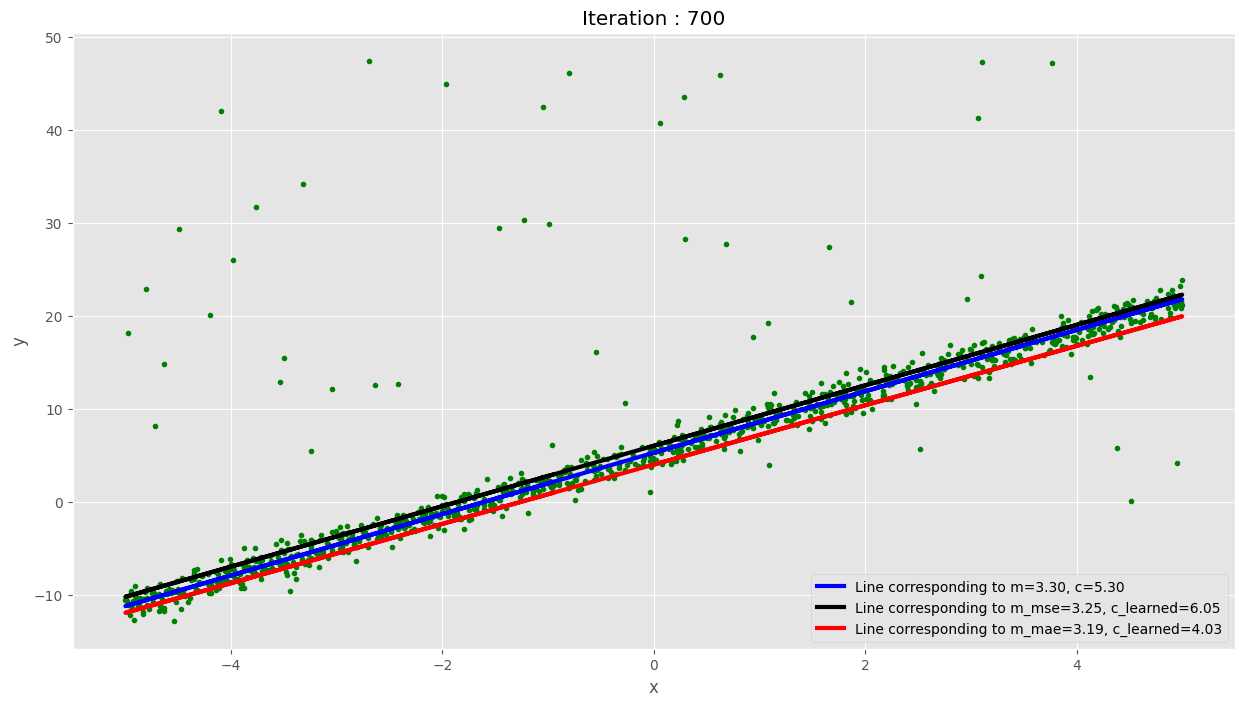

Iteration: 740, 
Loss_mse: 33.744, m_mse: 3.237, c_mse: 6.250
Loss_mae: 2.339, m_mae: 3.242,c_mae: 4.179


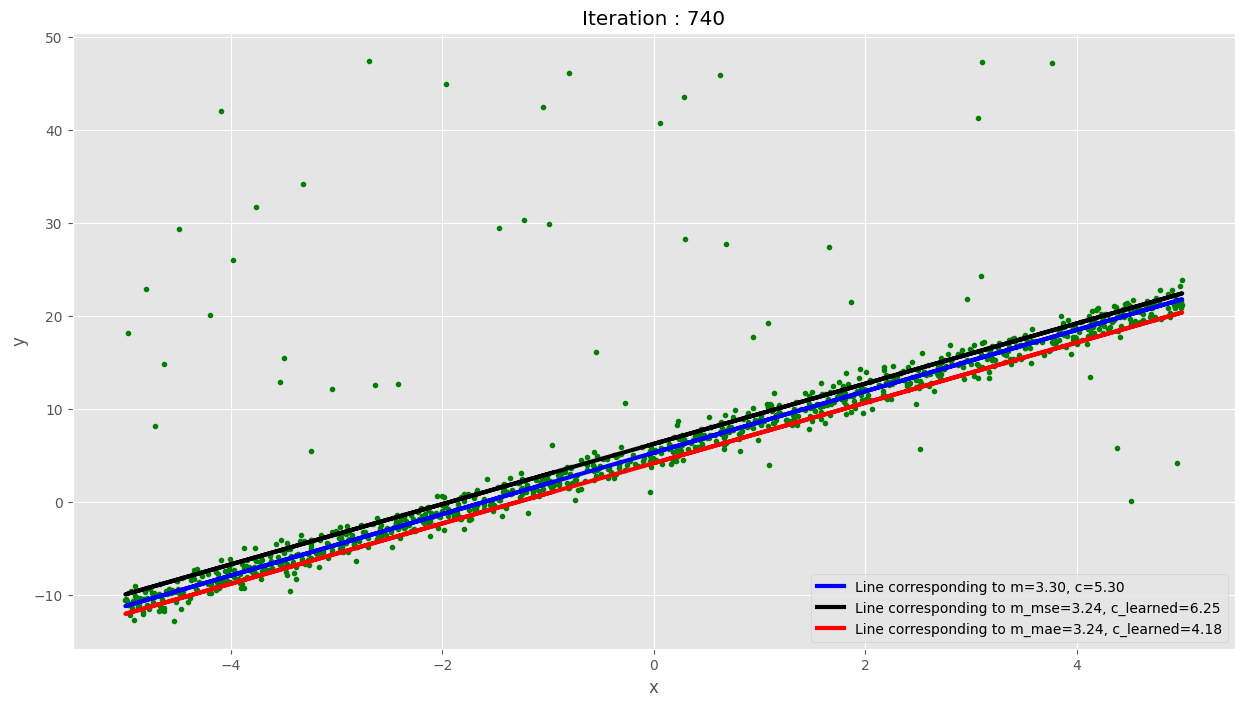

Iteration: 780, 
Loss_mse: 33.501, m_mse: 3.117, c_mse: 6.272
Loss_mae: 2.227, m_mae: 3.265,c_mae: 4.329


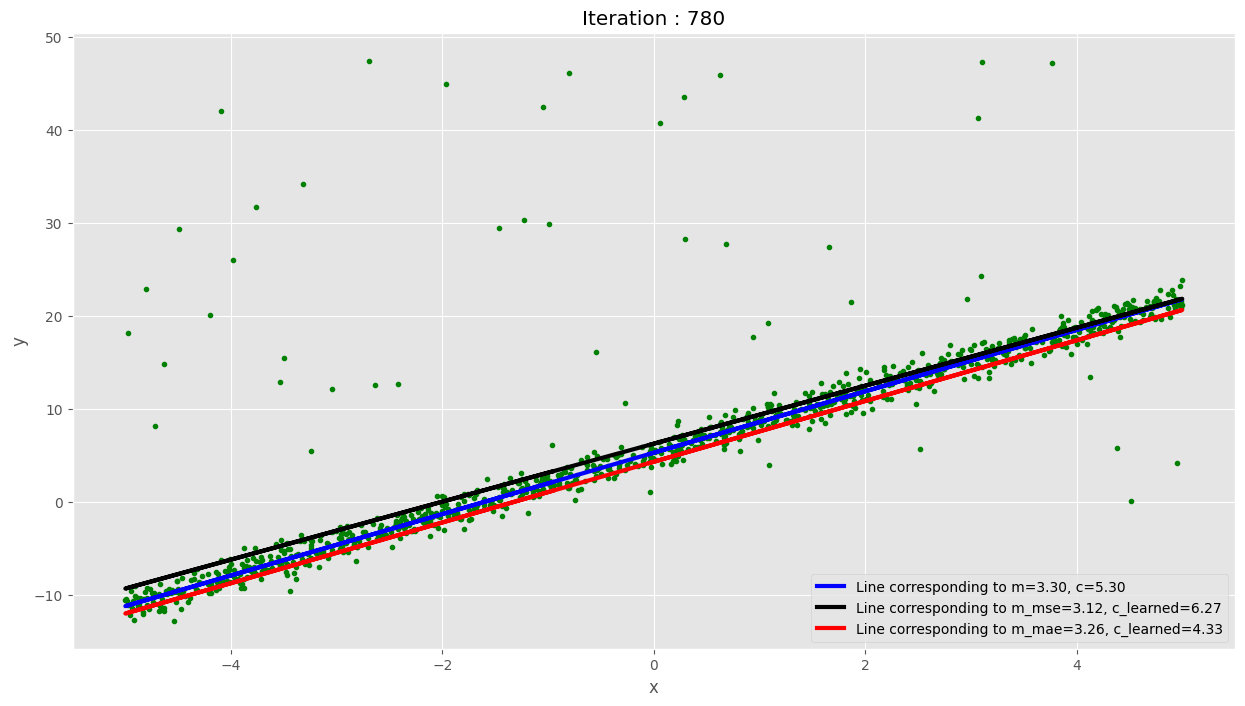

Iteration: 800, 
Loss_mse: 33.488, m_mse: 3.068, c_mse: 6.149
Loss_mae: 2.181, m_mae: 3.269,c_mae: 4.394


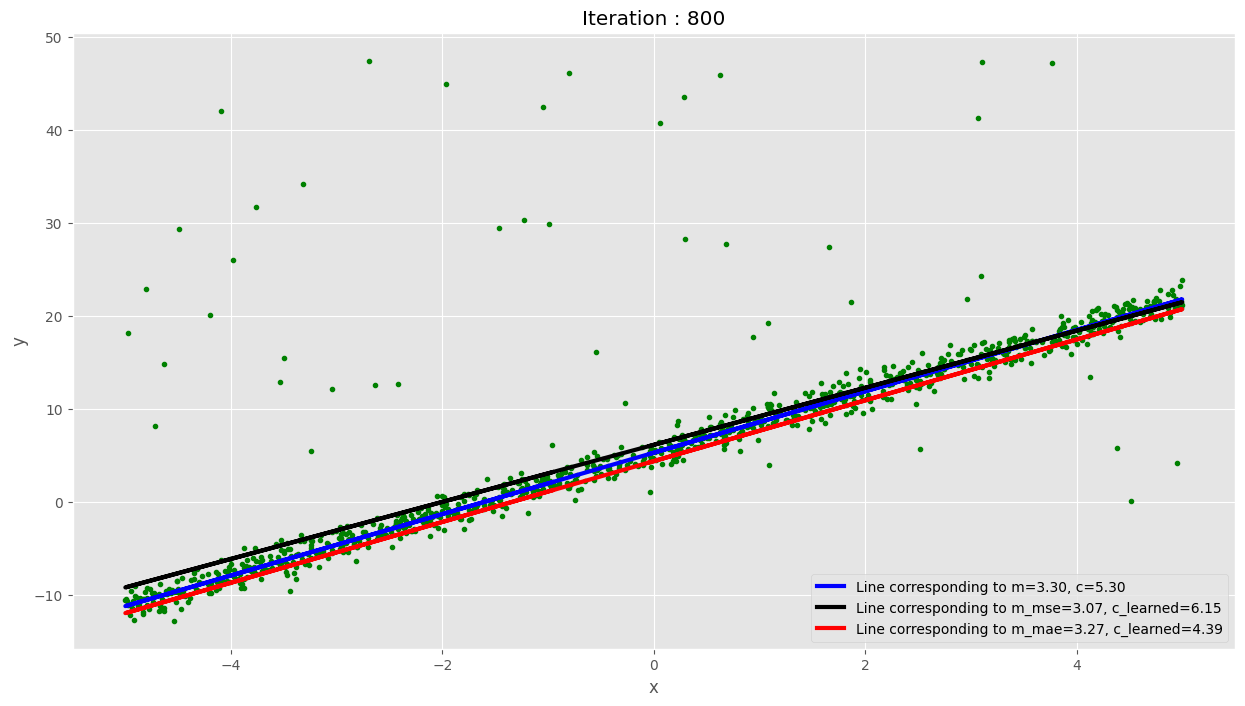

Iteration: 840, 
Loss_mse: 33.505, m_mse: 3.094, c_mse: 6.123
Loss_mae: 2.104, m_mae: 3.250,c_mae: 4.514


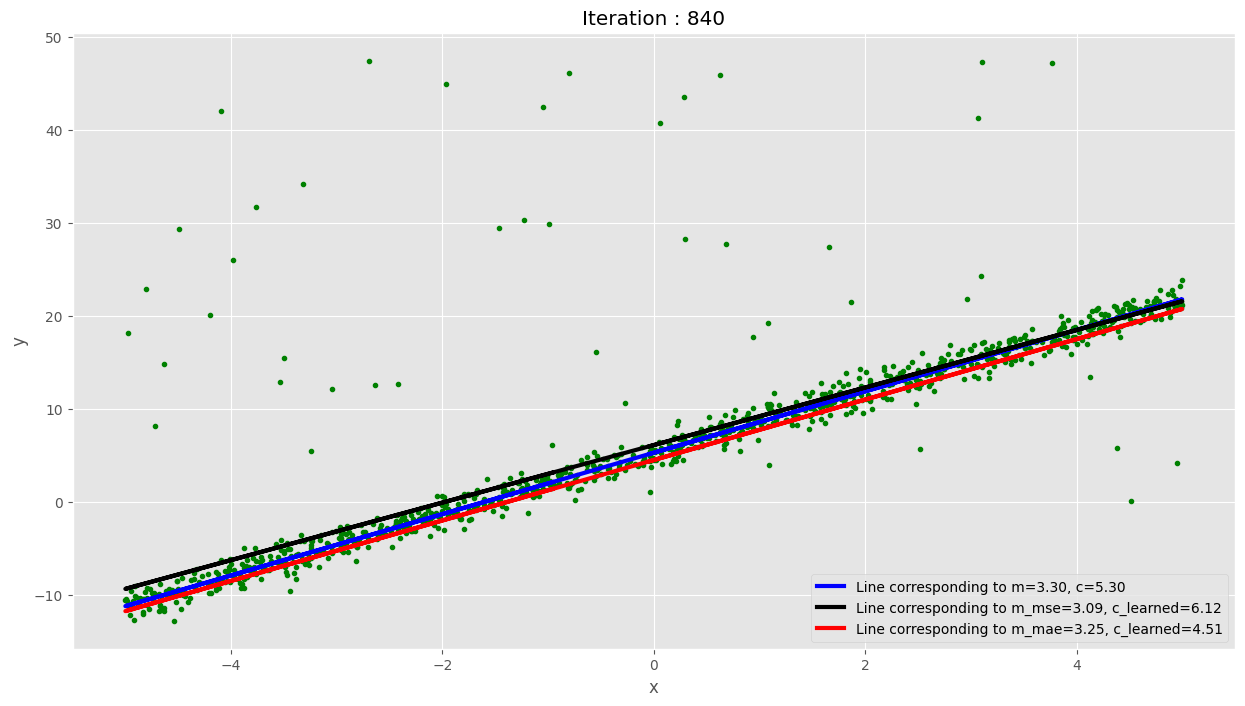

Iteration: 880, 
Loss_mse: 33.582, m_mse: 3.163, c_mse: 6.138
Loss_mae: 2.030, m_mae: 3.286,c_mae: 4.638


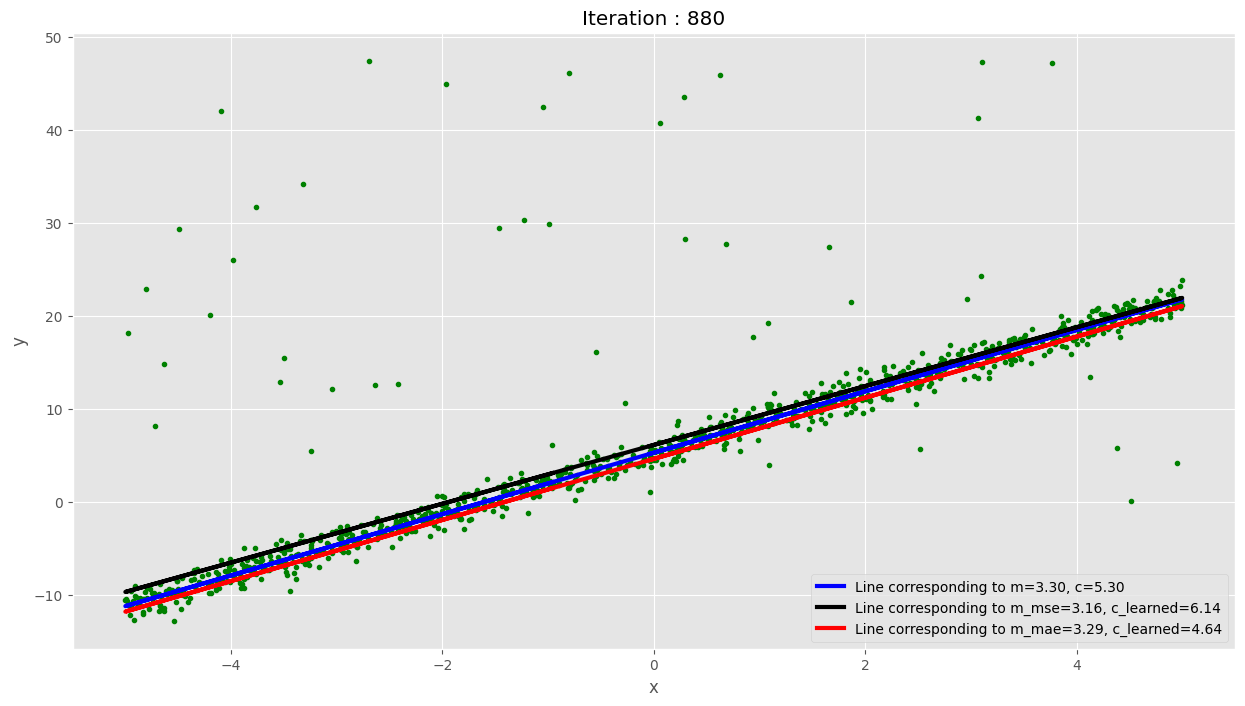

Iteration: 900, 
Loss_mse: 33.579, m_mse: 2.948, c_mse: 6.276
Loss_mae: 2.000, m_mae: 3.273,c_mae: 4.694


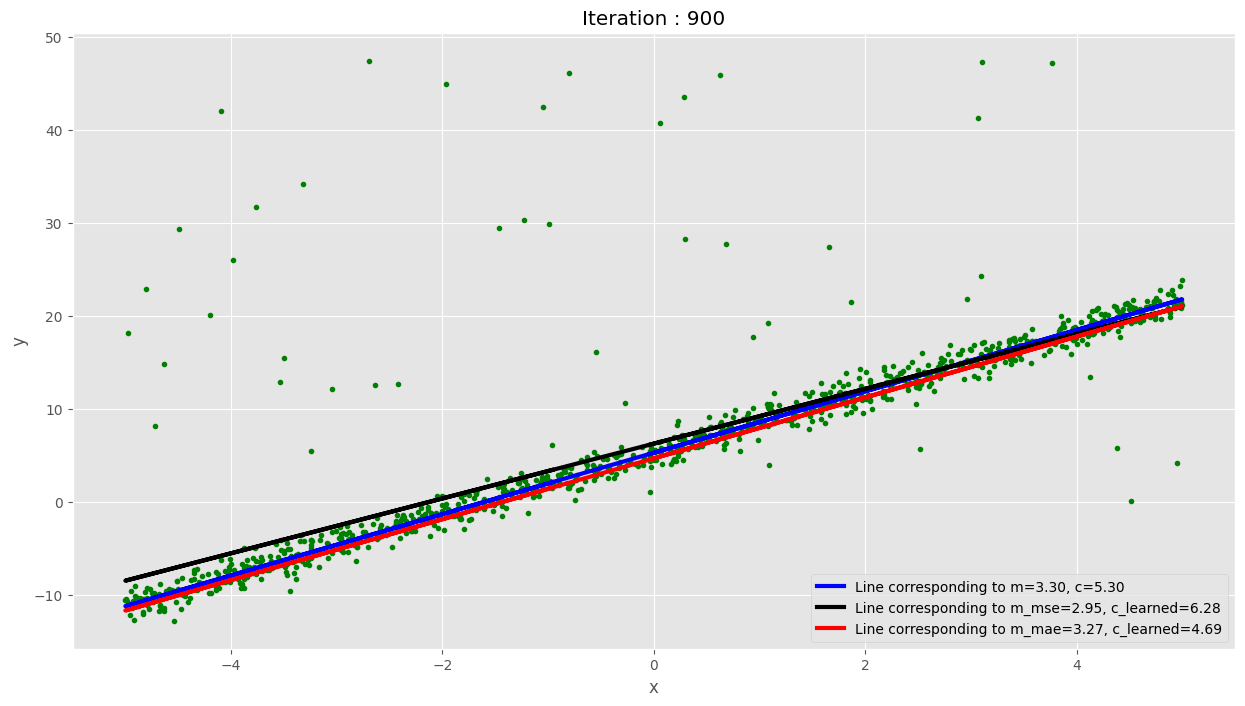

Iteration: 940, 
Loss_mse: 33.578, m_mse: 2.951, c_mse: 6.209
Loss_mae: 1.952, m_mae: 3.267,c_mae: 4.796


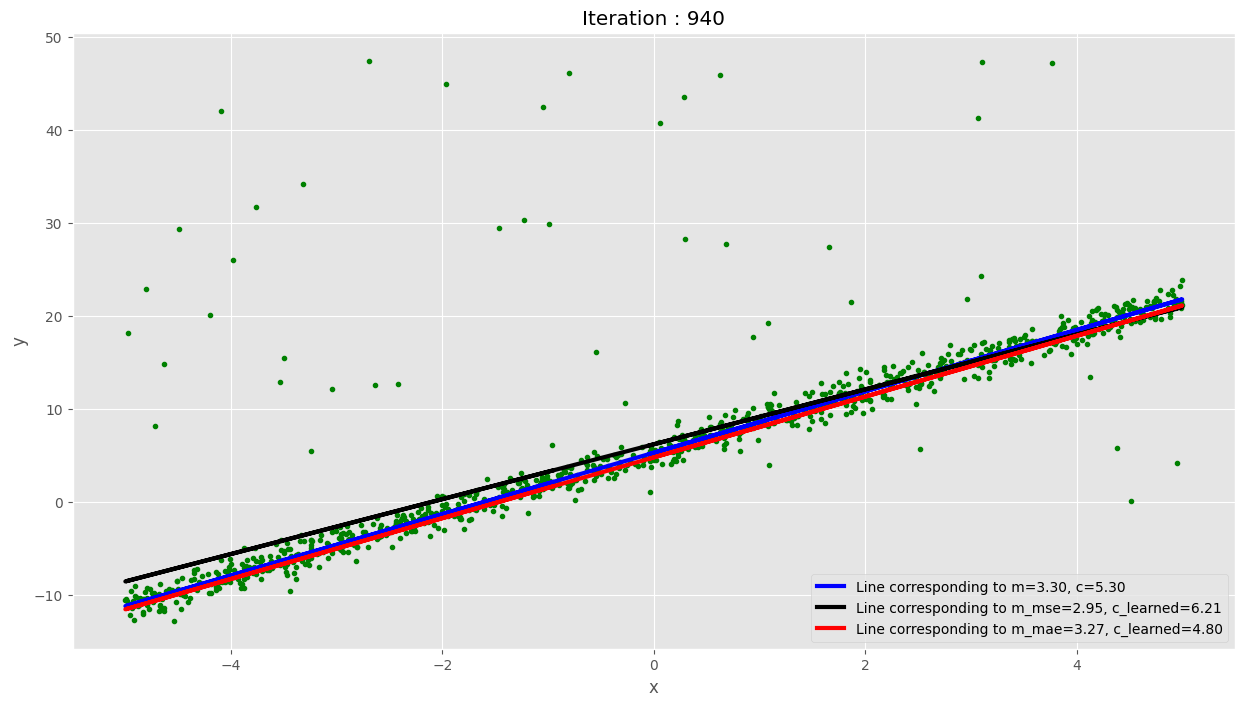

Iteration: 980, 
Loss_mse: 34.029, m_mse: 3.312, c_mse: 6.161
Loss_mae: 1.920, m_mae: 3.284,c_mae: 4.877


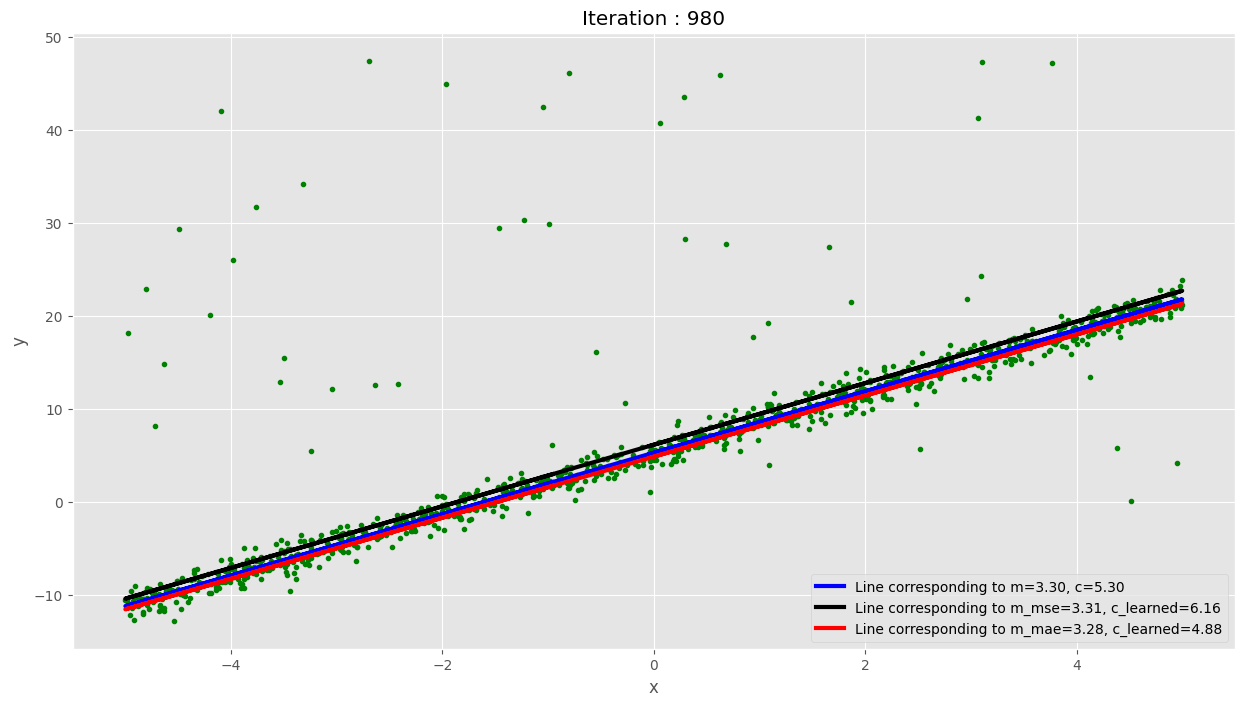

Iteration: 1000, 
Loss_mse: 33.547, m_mse: 2.977, c_mse: 6.148
Loss_mae: 1.911, m_mae: 3.277,c_mae: 4.904


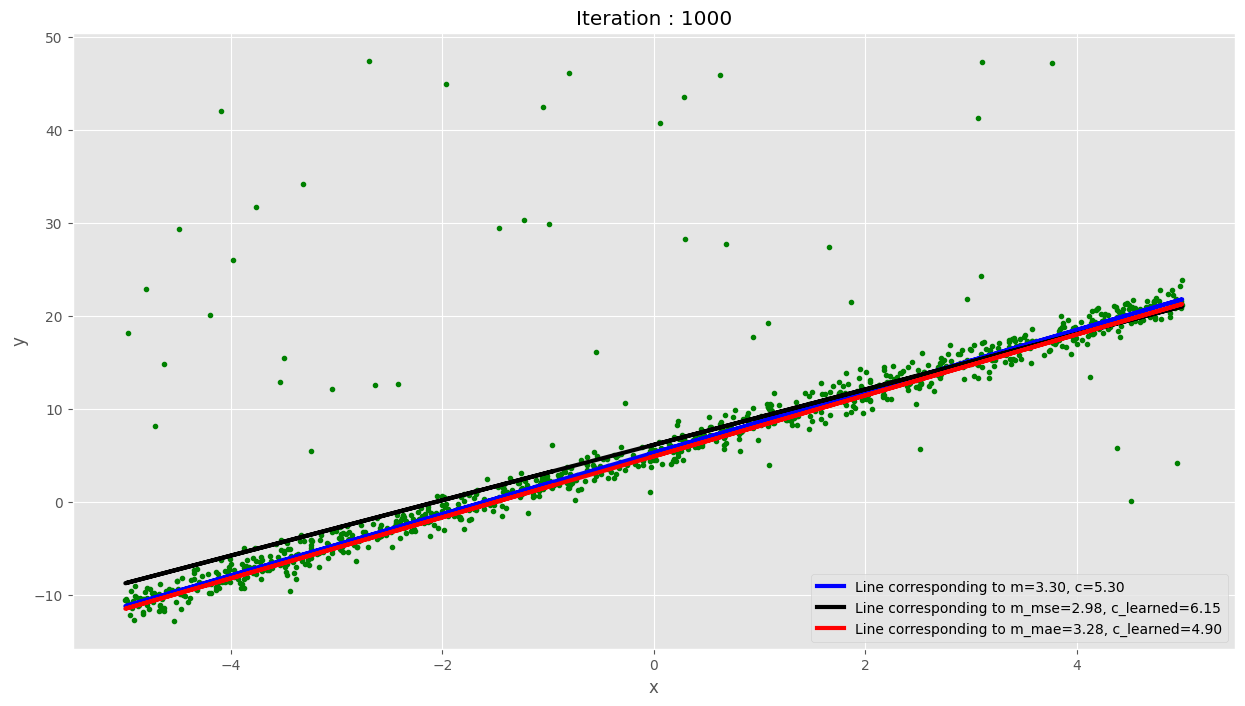

Iteration: 1040, 
Loss_mse: 33.604, m_mse: 3.173, c_mse: 6.122
Loss_mae: 1.891, m_mae: 3.310,c_mae: 4.974


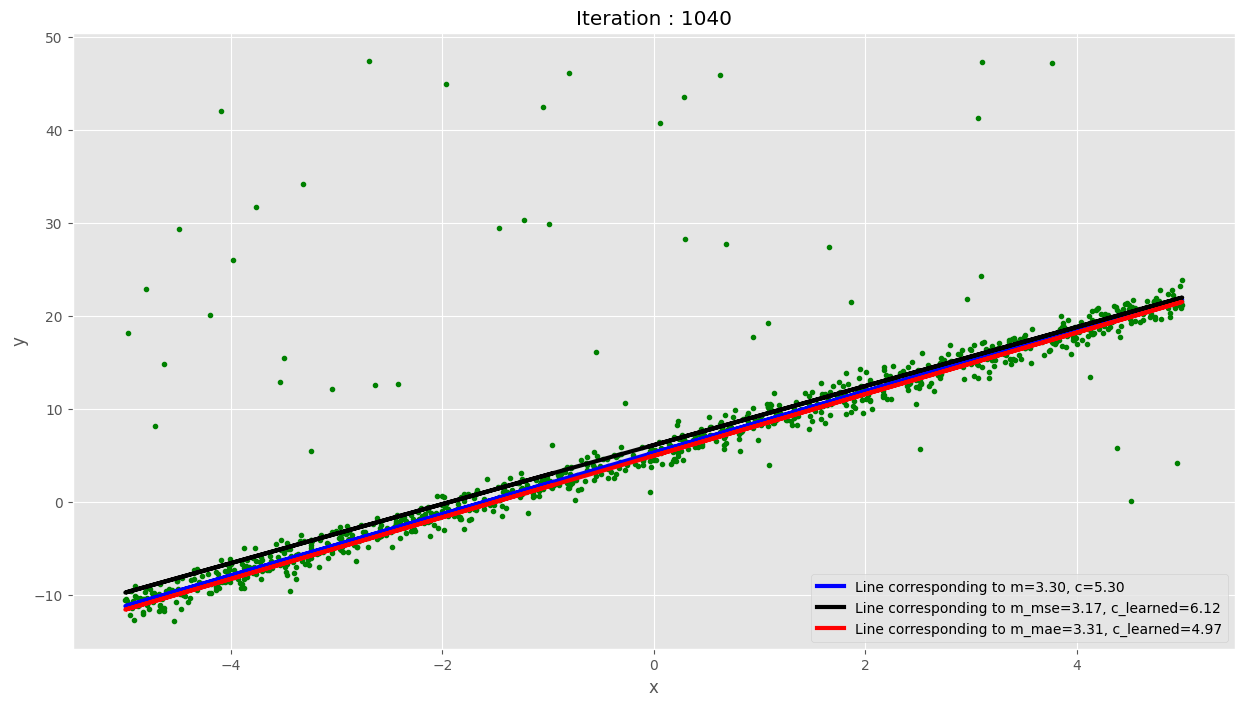

Iteration: 1080, 
Loss_mse: 33.635, m_mse: 2.925, c_mse: 6.191
Loss_mae: 1.881, m_mae: 3.278,c_mae: 5.005


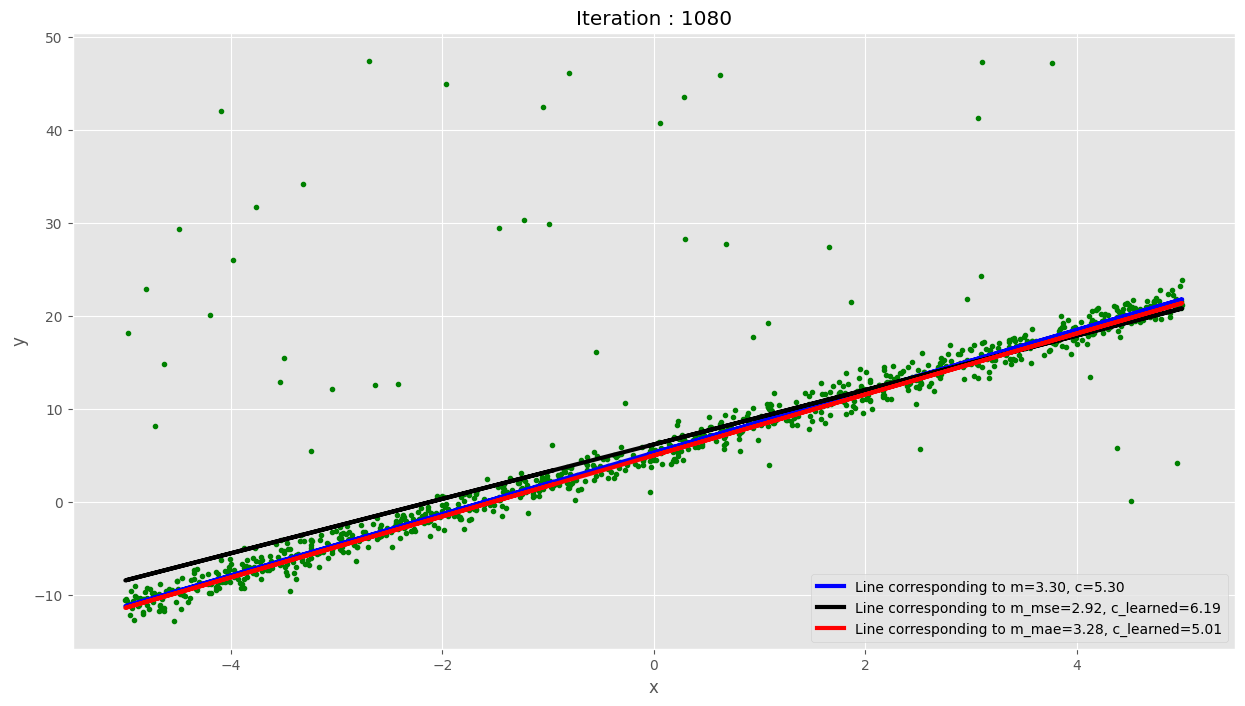

Iteration: 1100, 
Loss_mse: 33.697, m_mse: 3.220, c_mse: 6.214
Loss_mae: 1.875, m_mae: 3.311,c_mae: 5.034


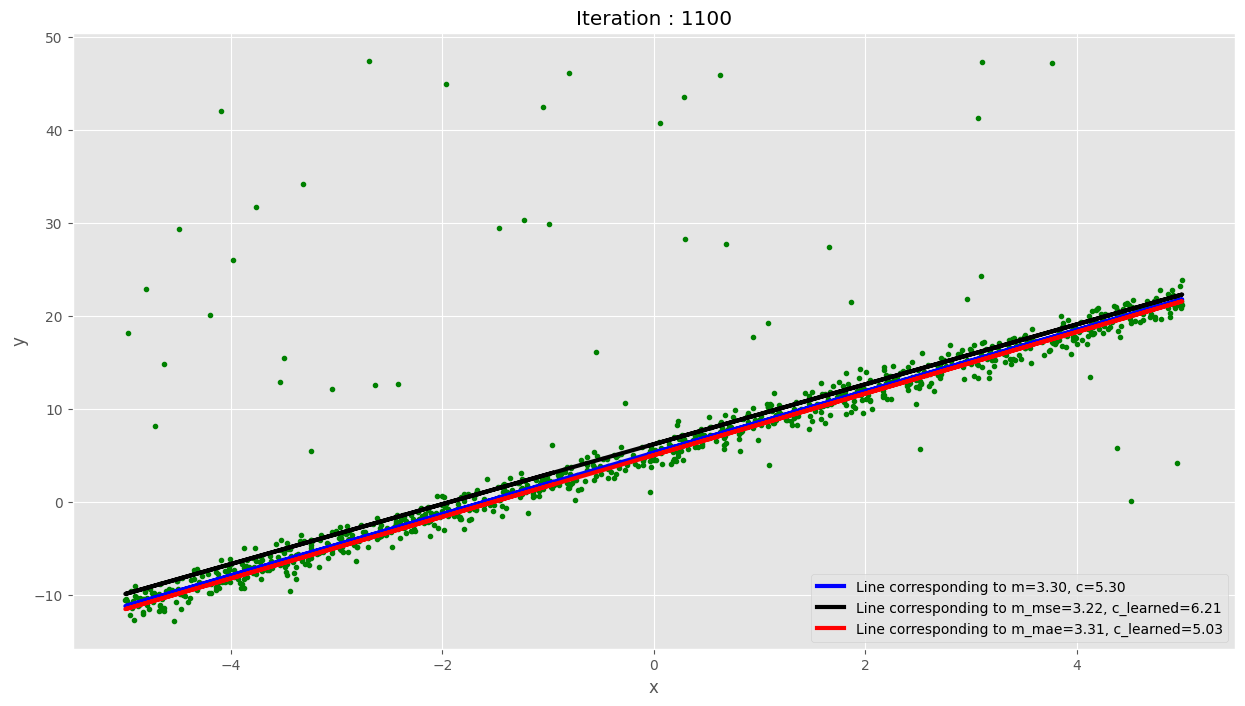

Iteration: 1140, 
Loss_mse: 33.525, m_mse: 3.138, c_mse: 6.262
Loss_mae: 1.865, m_mae: 3.261,c_mae: 5.080


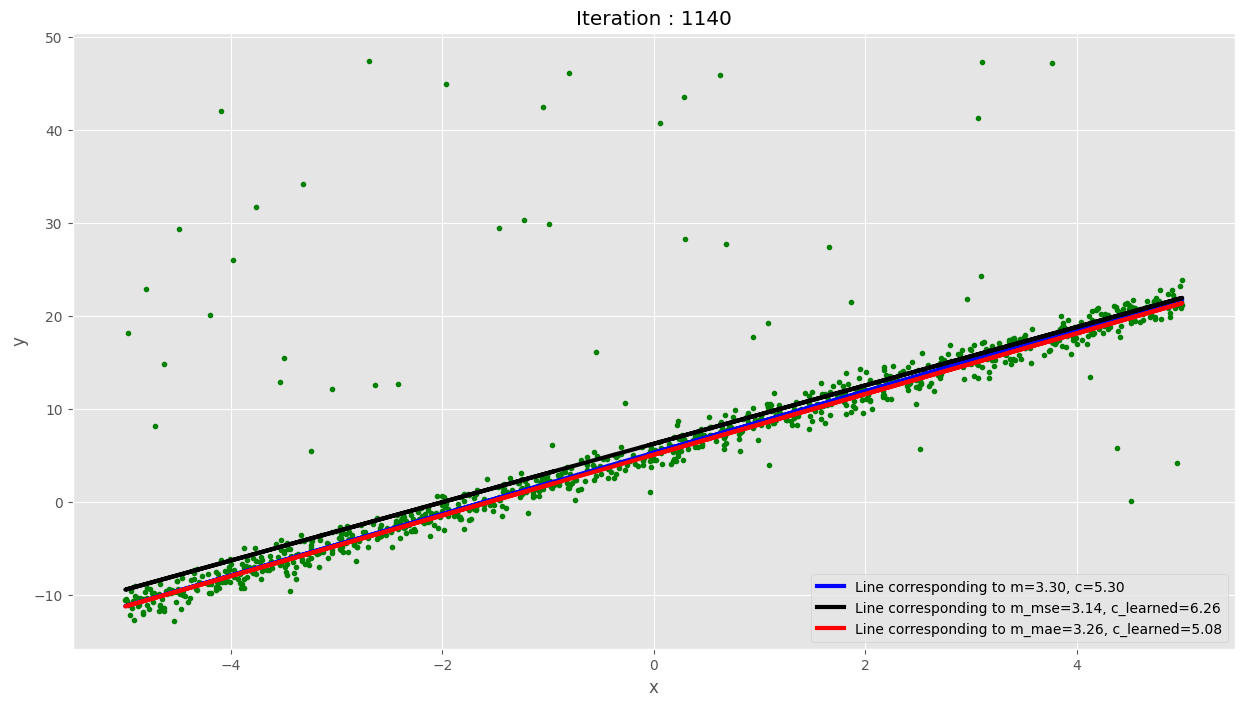

Iteration: 1180, 
Loss_mse: 33.629, m_mse: 3.186, c_mse: 6.133
Loss_mae: 1.860, m_mae: 3.287,c_mae: 5.097


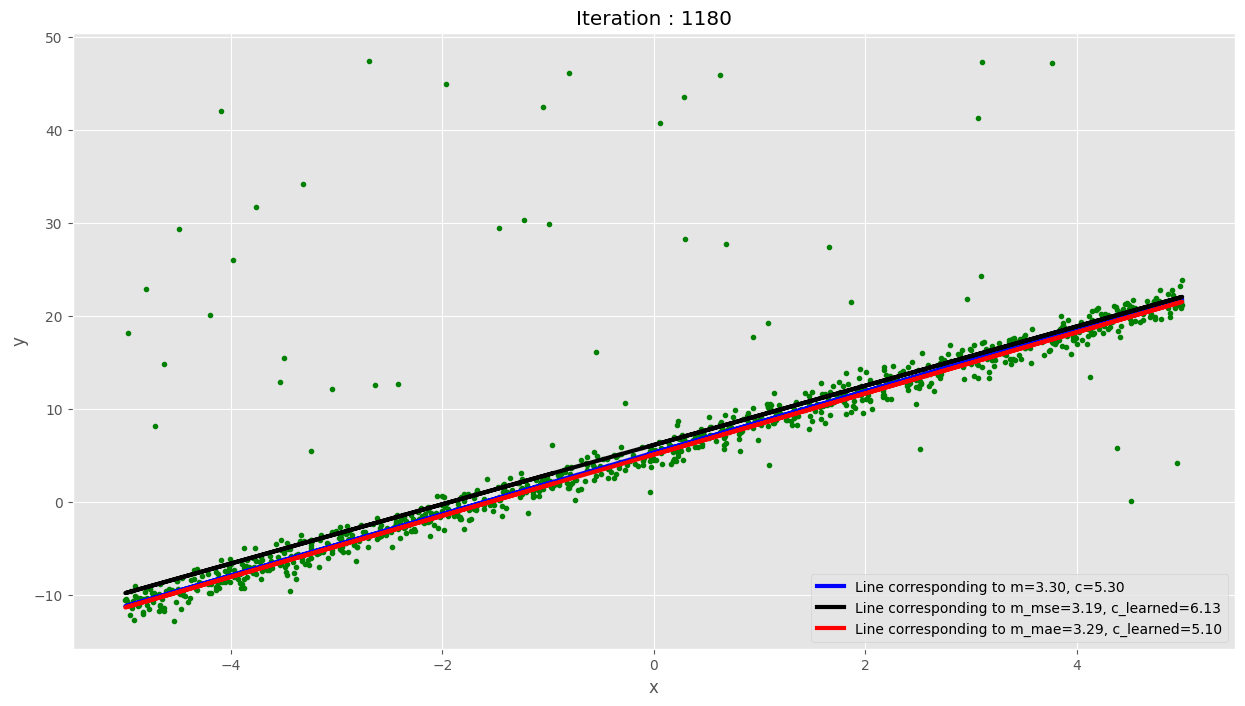

Iteration: 1200, 
Loss_mse: 33.658, m_mse: 3.201, c_mse: 6.154
Loss_mae: 1.858, m_mae: 3.287,c_mae: 5.107


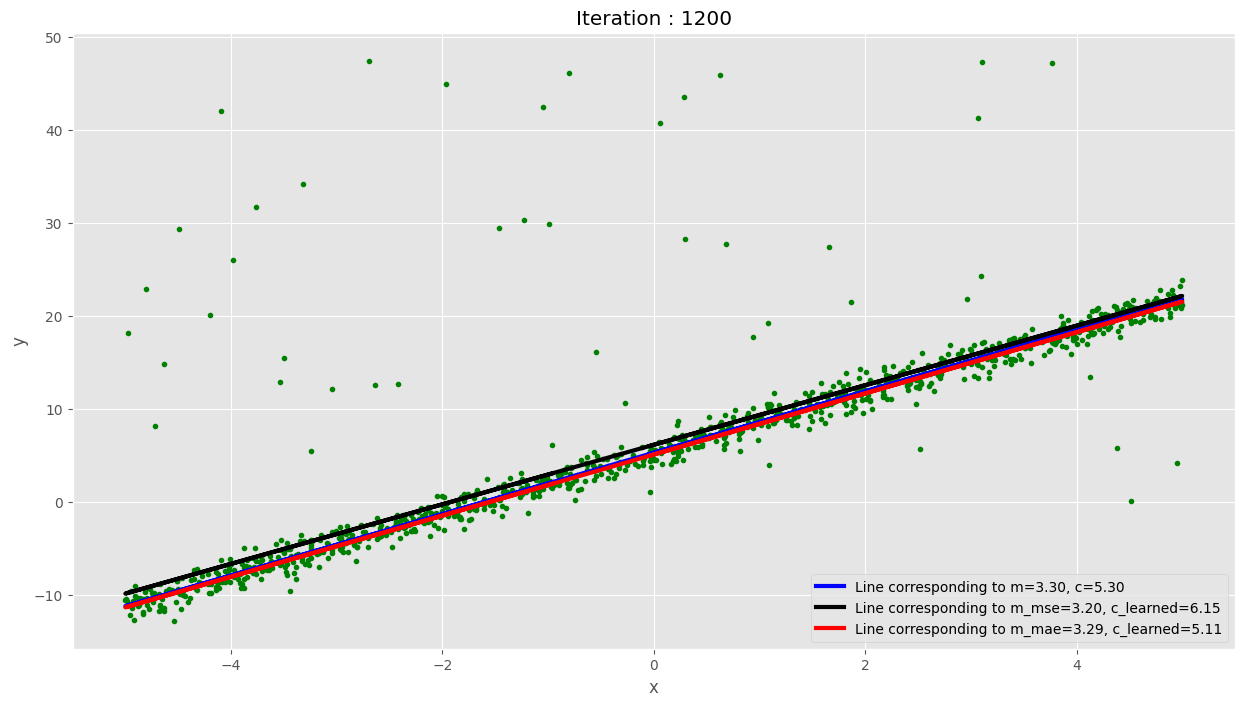

Iteration: 1240, 
Loss_mse: 33.496, m_mse: 3.081, c_mse: 6.134
Loss_mae: 1.851, m_mae: 3.295,c_mae: 5.148


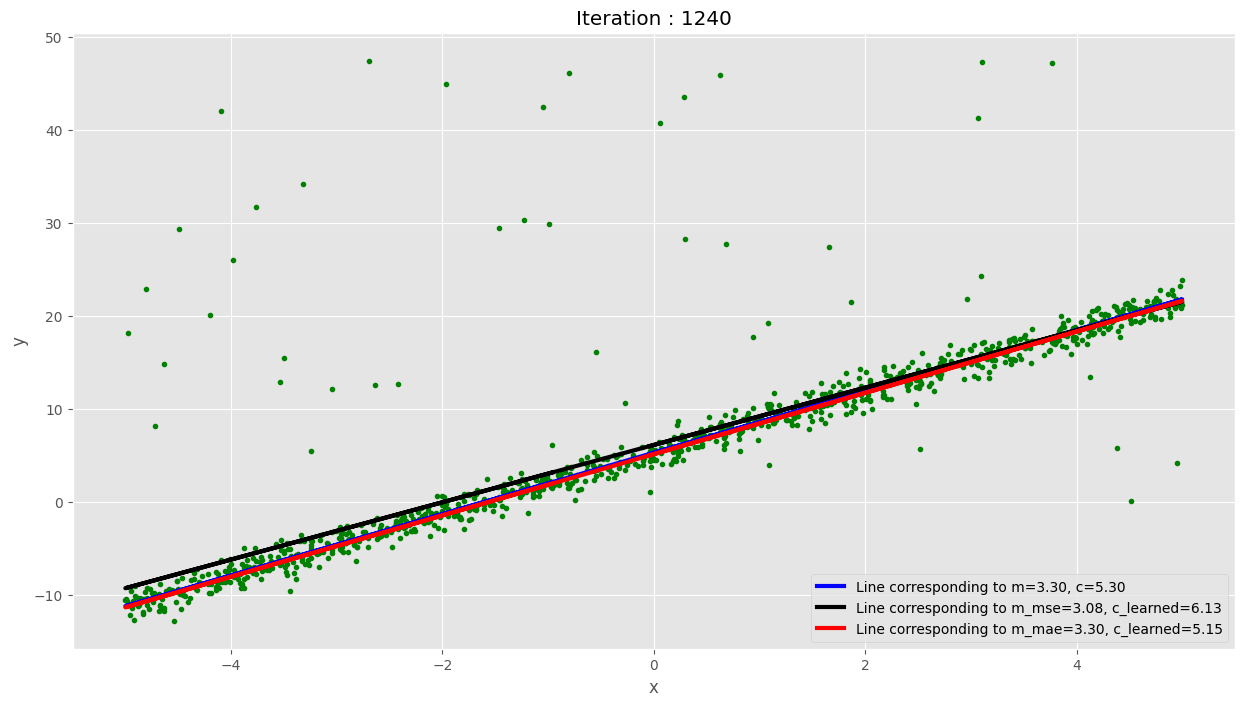

Iteration: 1280, 
Loss_mse: 33.536, m_mse: 3.070, c_mse: 6.023
Loss_mae: 1.851, m_mae: 3.255,c_mae: 5.164


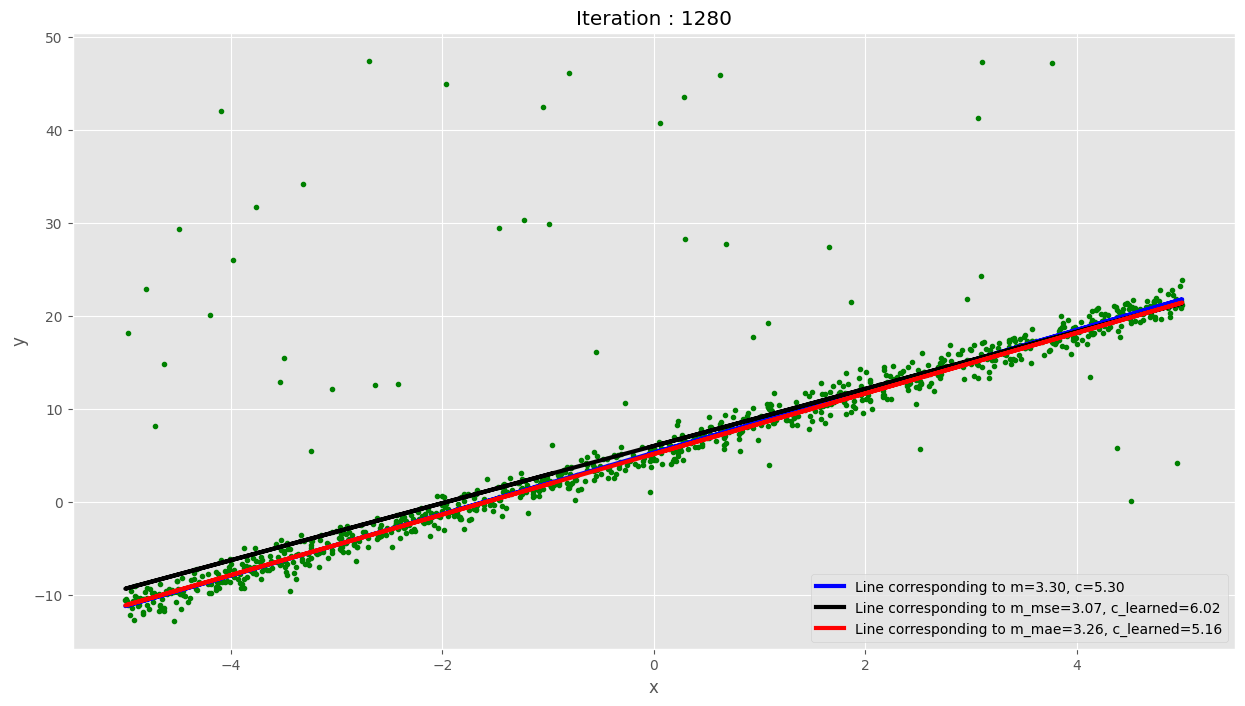

Iteration: 1300, 
Loss_mse: 33.515, m_mse: 3.043, c_mse: 6.073
Loss_mae: 1.849, m_mae: 3.257,c_mae: 5.180


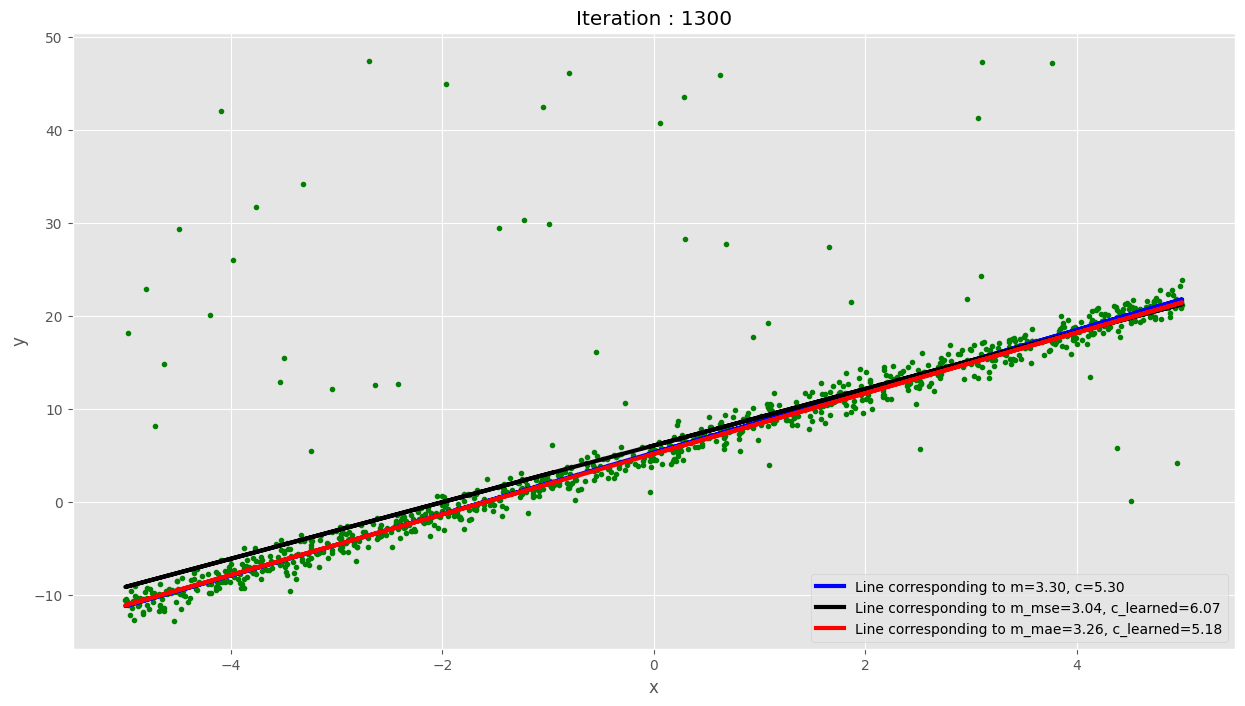

Iteration: 1340, 
Loss_mse: 34.028, m_mse: 3.310, c_mse: 6.136
Loss_mae: 1.843, m_mae: 3.275,c_mae: 5.203


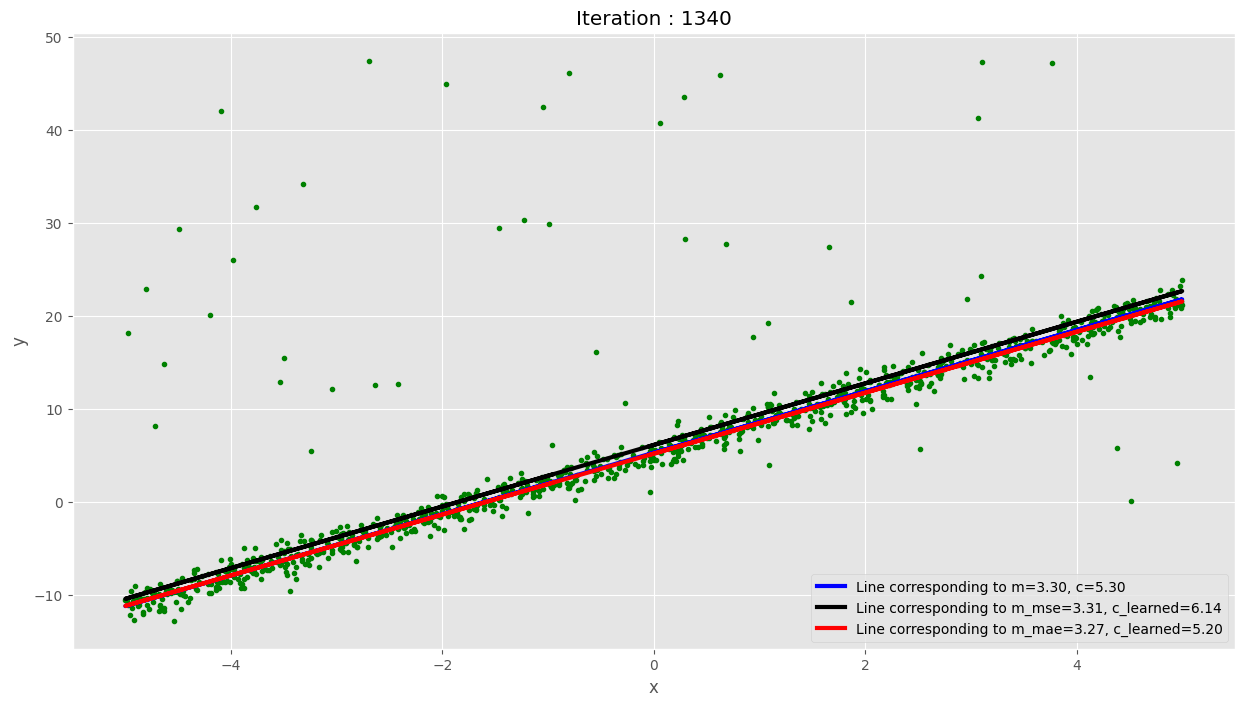

Iteration: 1380, 
Loss_mse: 33.520, m_mse: 3.127, c_mse: 6.179
Loss_mae: 1.842, m_mae: 3.292,c_mae: 5.216


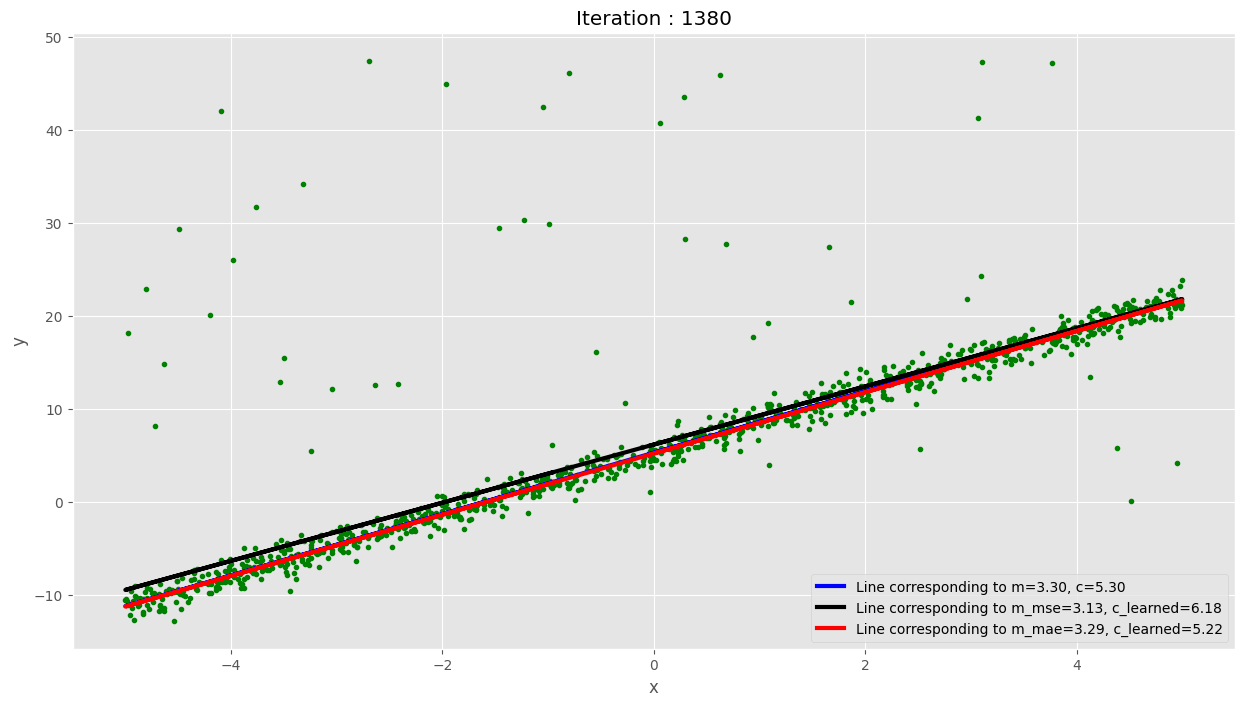

Iteration: 1400, 
Loss_mse: 33.678, m_mse: 2.905, c_mse: 6.287
Loss_mae: 1.841, m_mae: 3.302,c_mae: 5.229


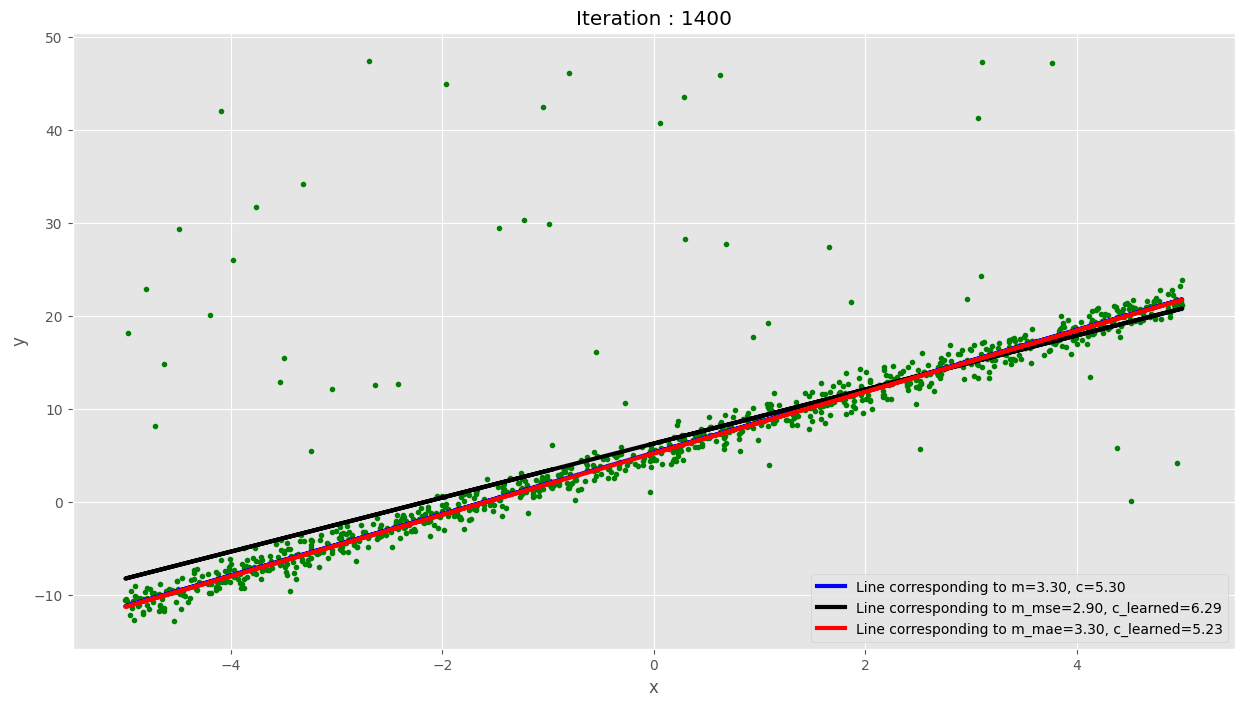

Iteration: 1440, 
Loss_mse: 33.571, m_mse: 2.953, c_mse: 6.314
Loss_mae: 1.840, m_mae: 3.290,c_mae: 5.238


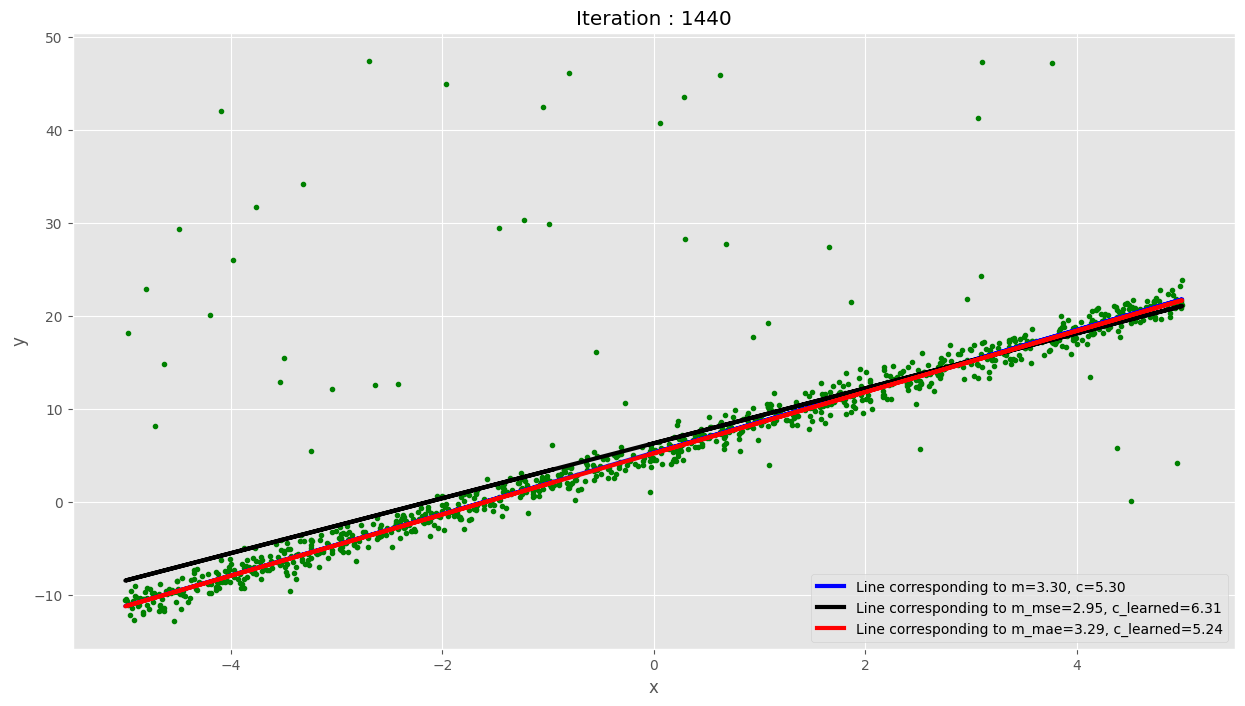

Iteration: 1480, 
Loss_mse: 33.476, m_mse: 3.045, c_mse: 6.310
Loss_mae: 1.841, m_mae: 3.252,c_mae: 5.252


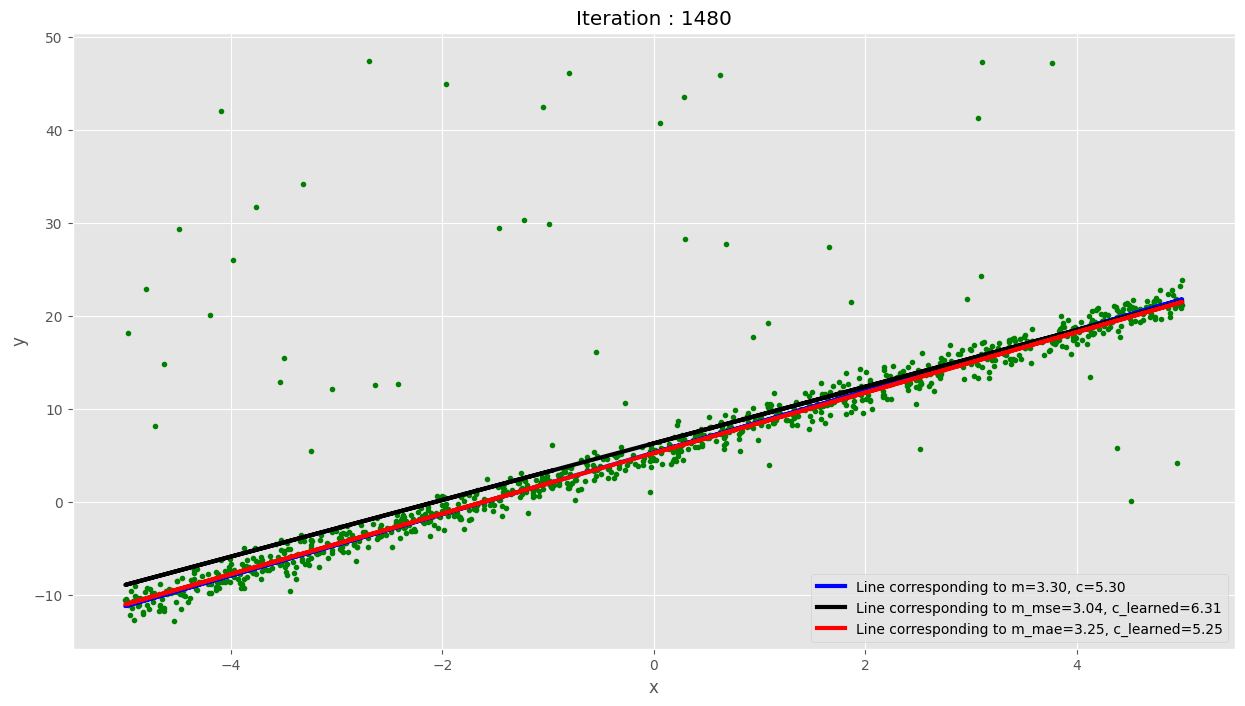

Iteration: 1500, 
Loss_mse: 33.481, m_mse: 3.042, c_mse: 6.351
Loss_mae: 1.838, m_mae: 3.257,c_mae: 5.278


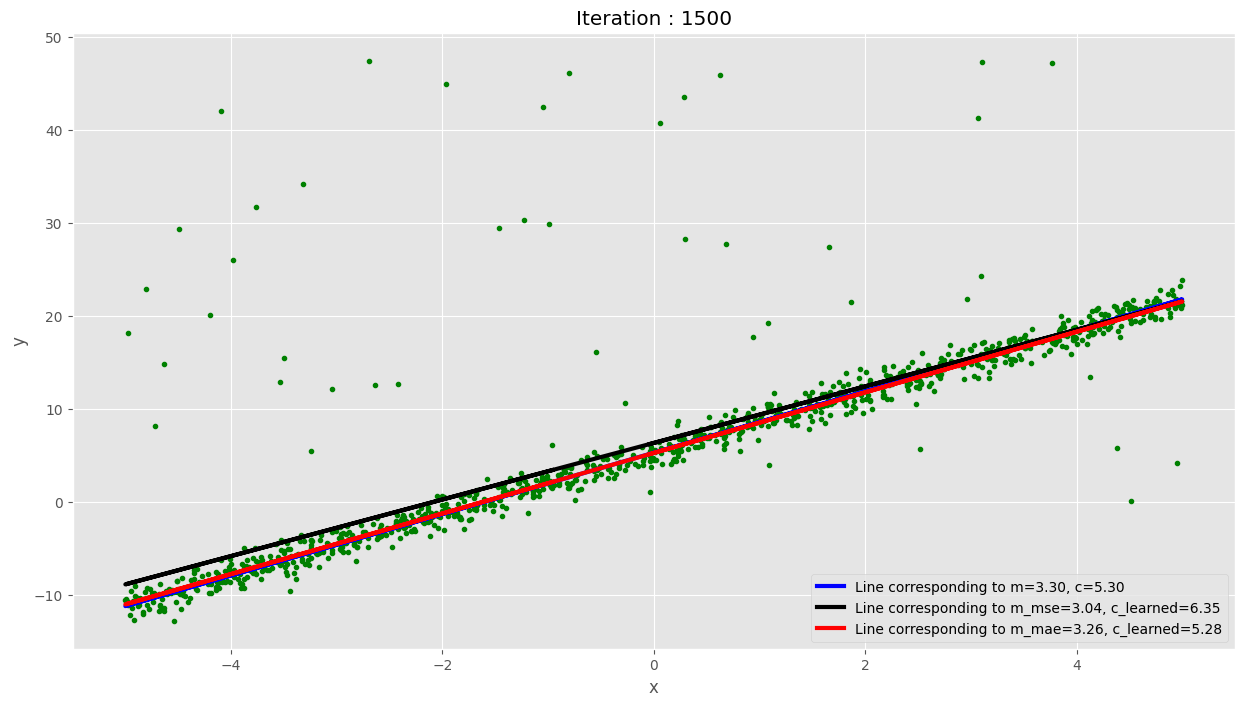

Iteration: 1540, 
Loss_mse: 33.628, m_mse: 2.941, c_mse: 6.462
Loss_mae: 1.836, m_mae: 3.271,c_mae: 5.305


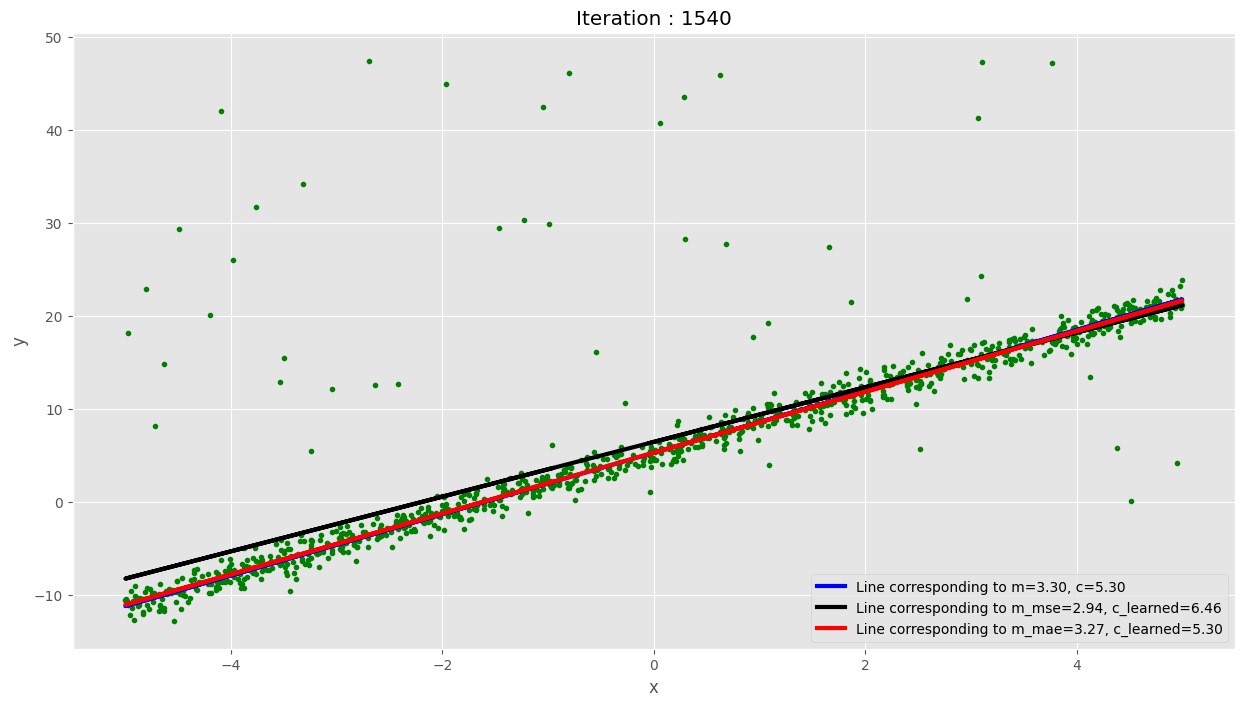

Iteration: 1580, 
Loss_mse: 33.516, m_mse: 2.989, c_mse: 6.307
Loss_mae: 1.835, m_mae: 3.289,c_mae: 5.312


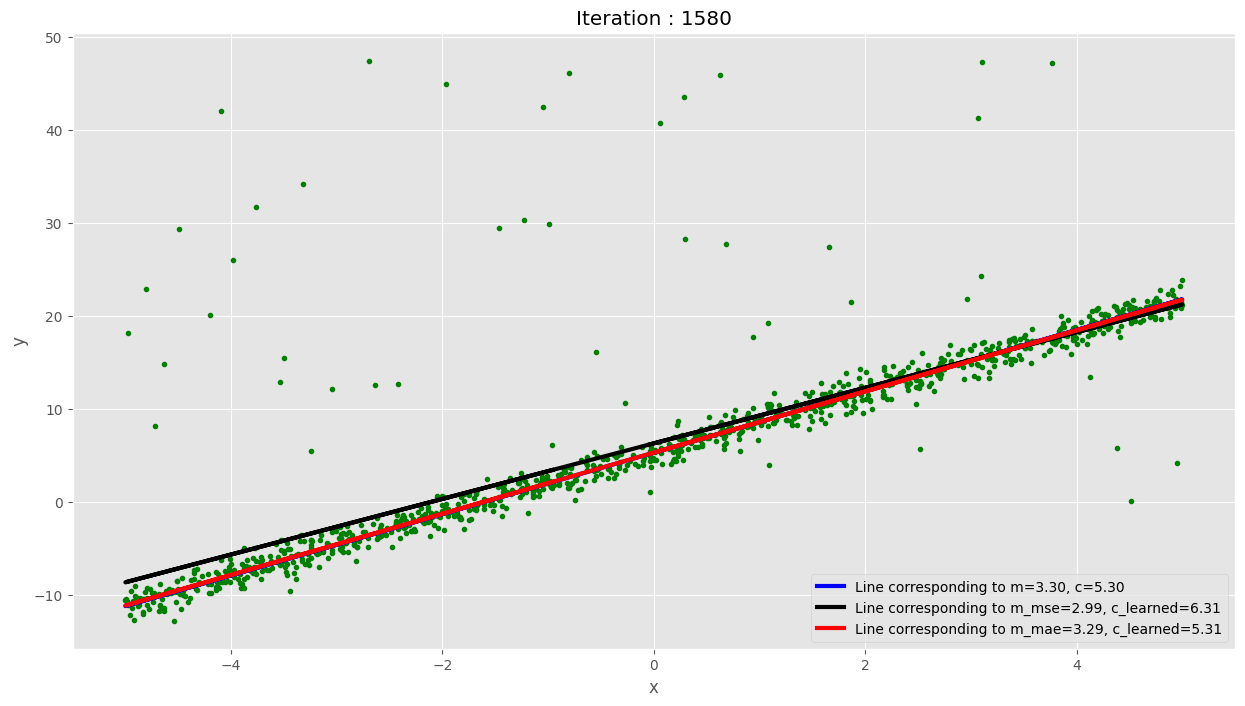

Iteration: 1600, 
Loss_mse: 33.480, m_mse: 3.054, c_mse: 6.356
Loss_mae: 1.838, m_mae: 3.311,c_mae: 5.317


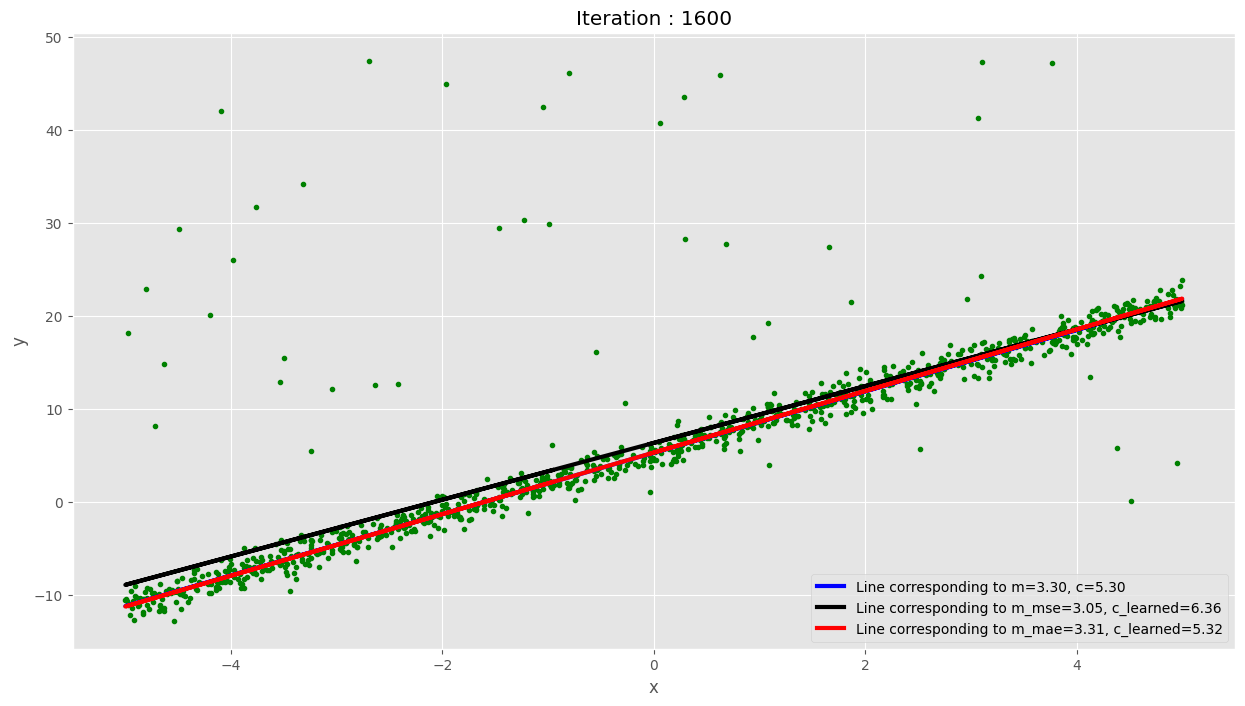

Iteration: 1640, 
Loss_mse: 33.619, m_mse: 3.186, c_mse: 6.170
Loss_mae: 1.835, m_mae: 3.291,c_mae: 5.320


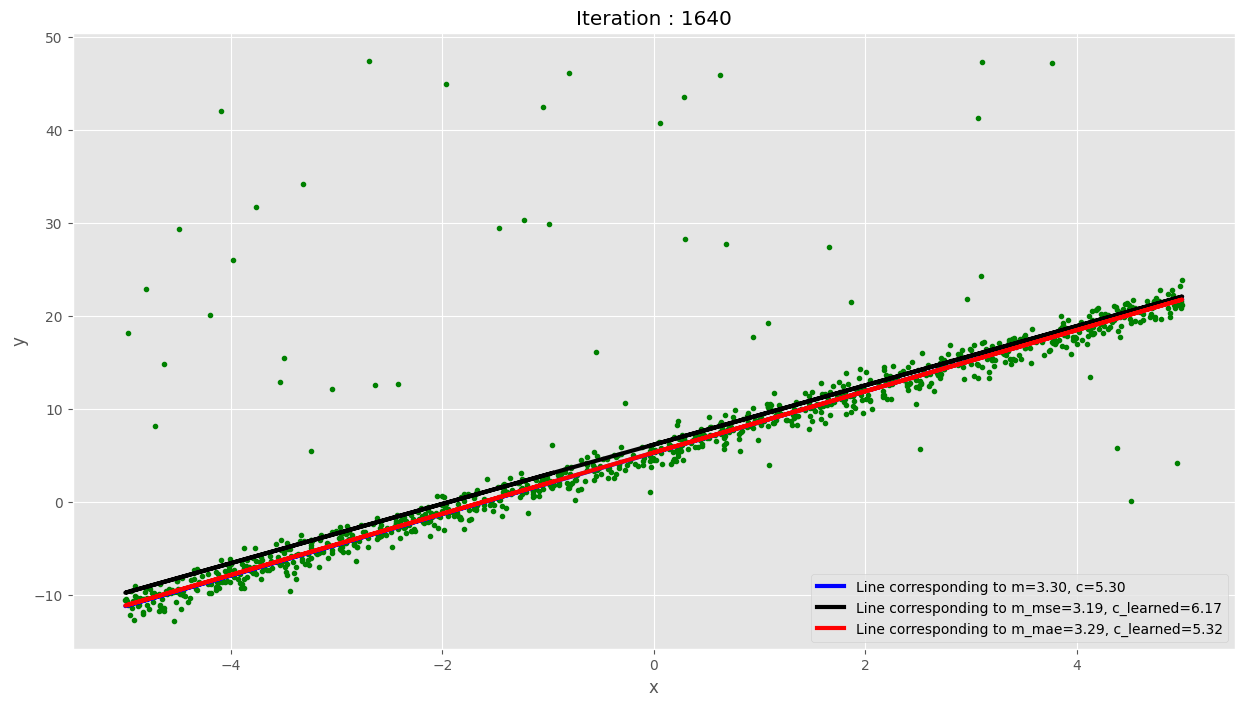

Iteration: 1680, 
Loss_mse: 33.573, m_mse: 3.136, c_mse: 6.047
Loss_mae: 1.835, m_mae: 3.287,c_mae: 5.313


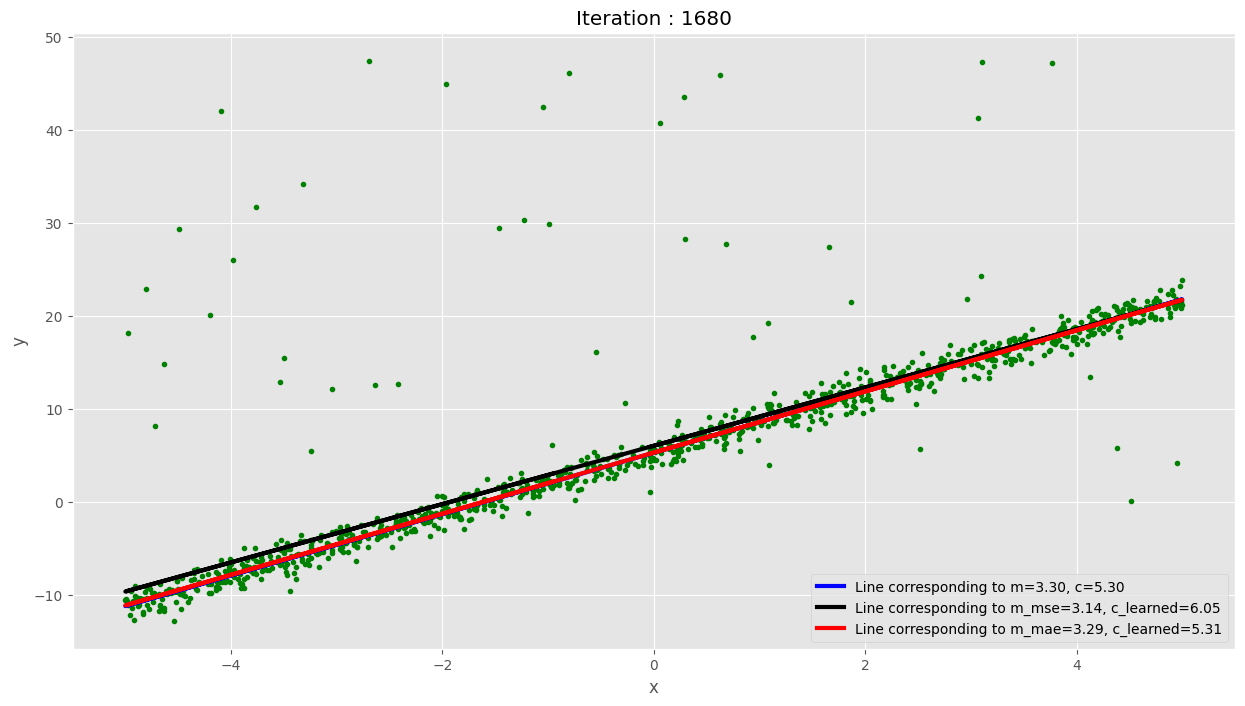

Iteration: 1700, 
Loss_mse: 33.609, m_mse: 3.155, c_mse: 6.032
Loss_mae: 1.835, m_mae: 3.279,c_mae: 5.311


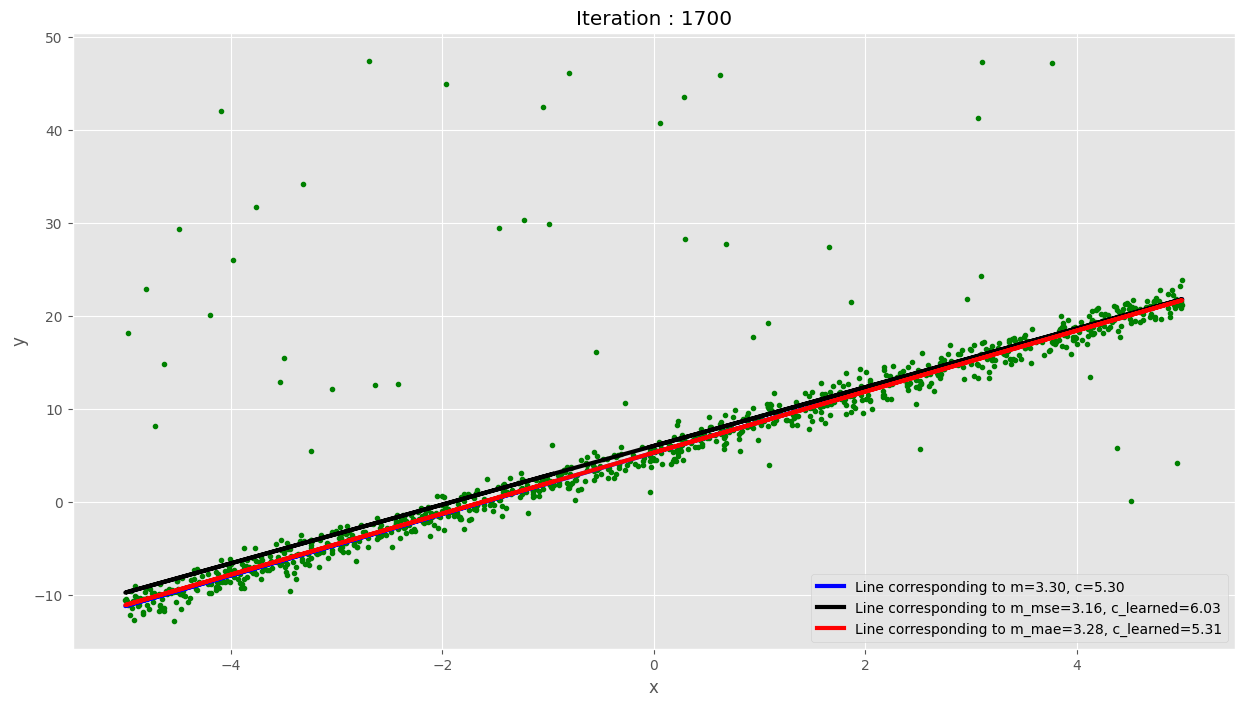

Iteration: 1740, 
Loss_mse: 33.584, m_mse: 3.145, c_mse: 6.049
Loss_mae: 1.836, m_mae: 3.271,c_mae: 5.304


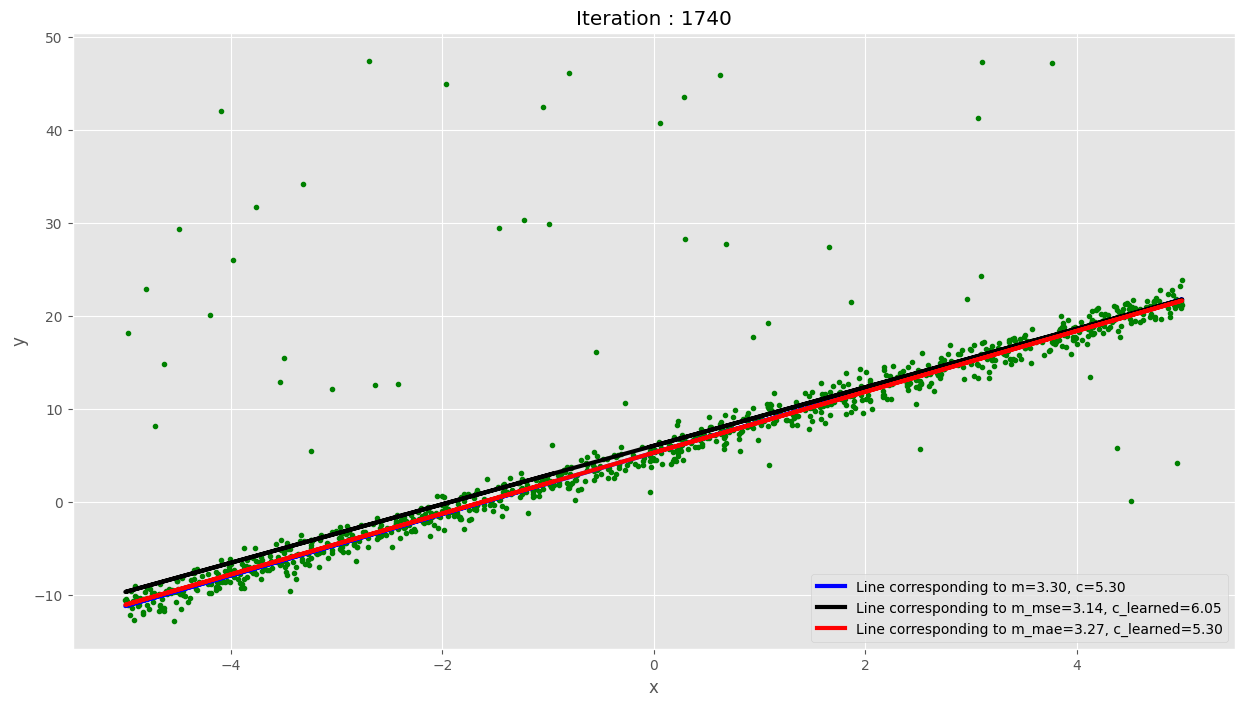

Iteration: 1780, 
Loss_mse: 33.594, m_mse: 3.155, c_mse: 6.064
Loss_mae: 1.836, m_mae: 3.258,c_mae: 5.320


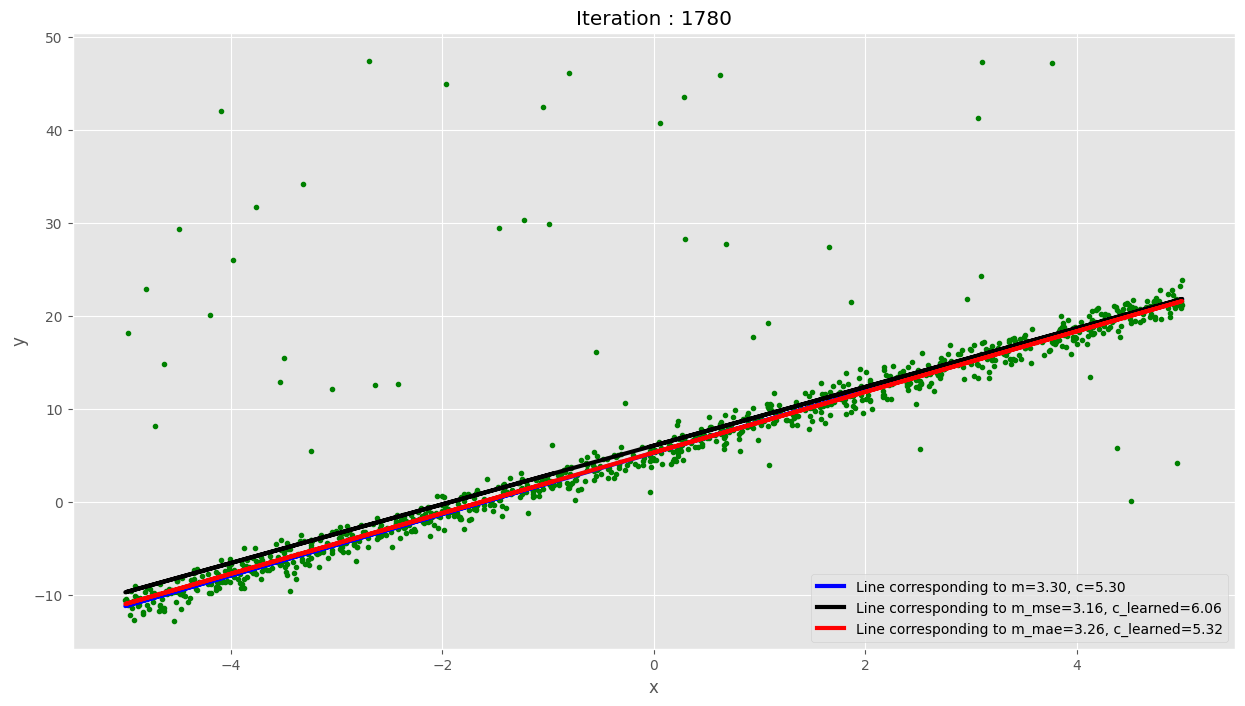

Iteration: 1800, 
Loss_mse: 33.630, m_mse: 3.171, c_mse: 6.046
Loss_mae: 1.837, m_mae: 3.257,c_mae: 5.303


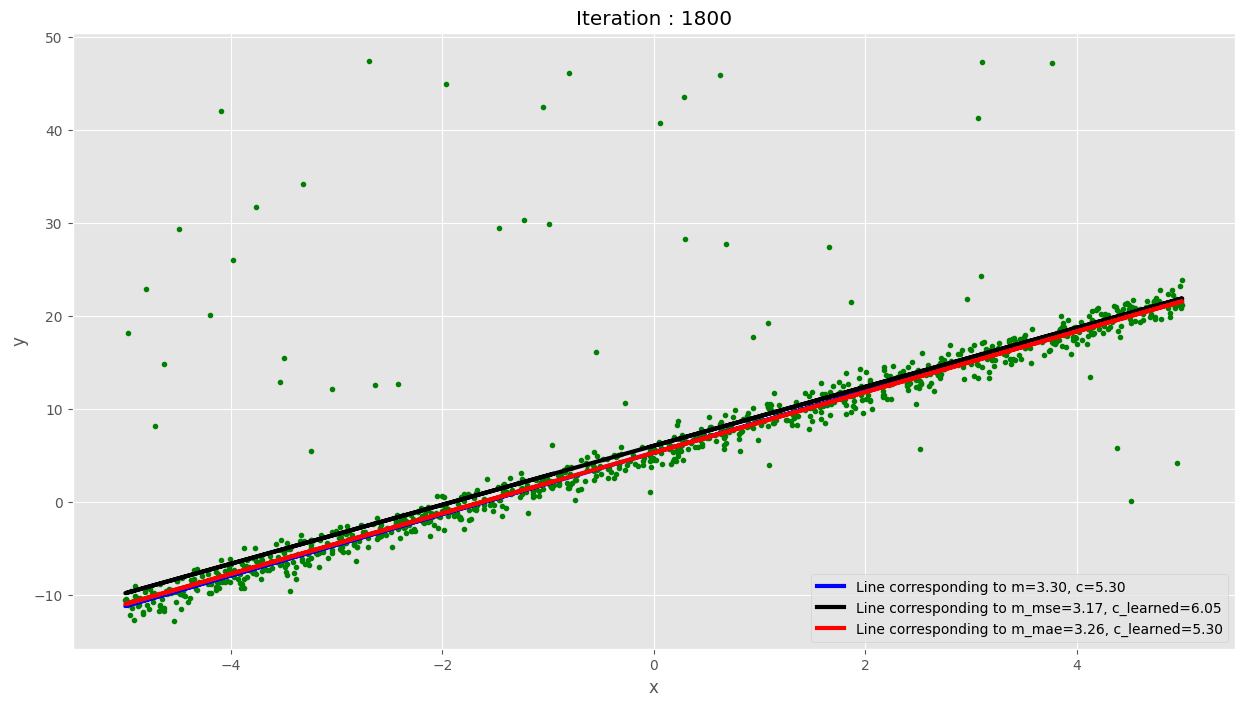

Iteration: 1840, 
Loss_mse: 33.572, m_mse: 3.008, c_mse: 5.997
Loss_mae: 1.837, m_mae: 3.257,c_mae: 5.315


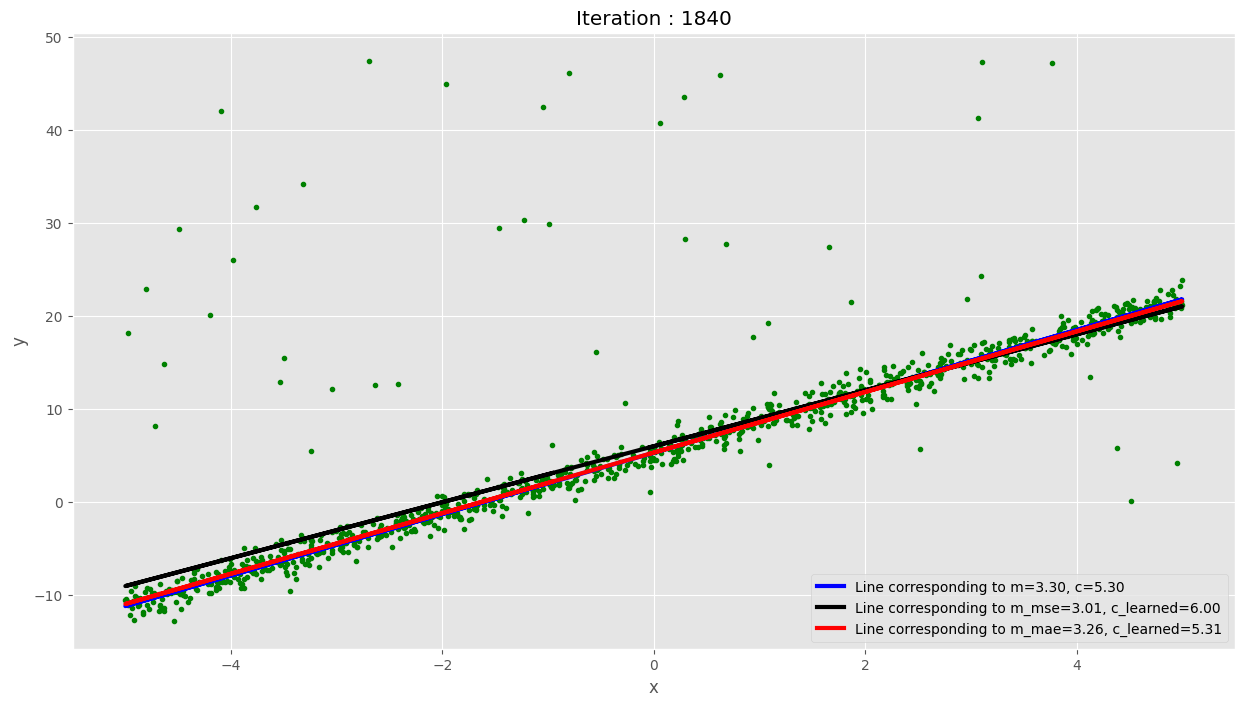

Iteration: 1880, 
Loss_mse: 33.499, m_mse: 3.076, c_mse: 6.116
Loss_mae: 1.837, m_mae: 3.253,c_mae: 5.328


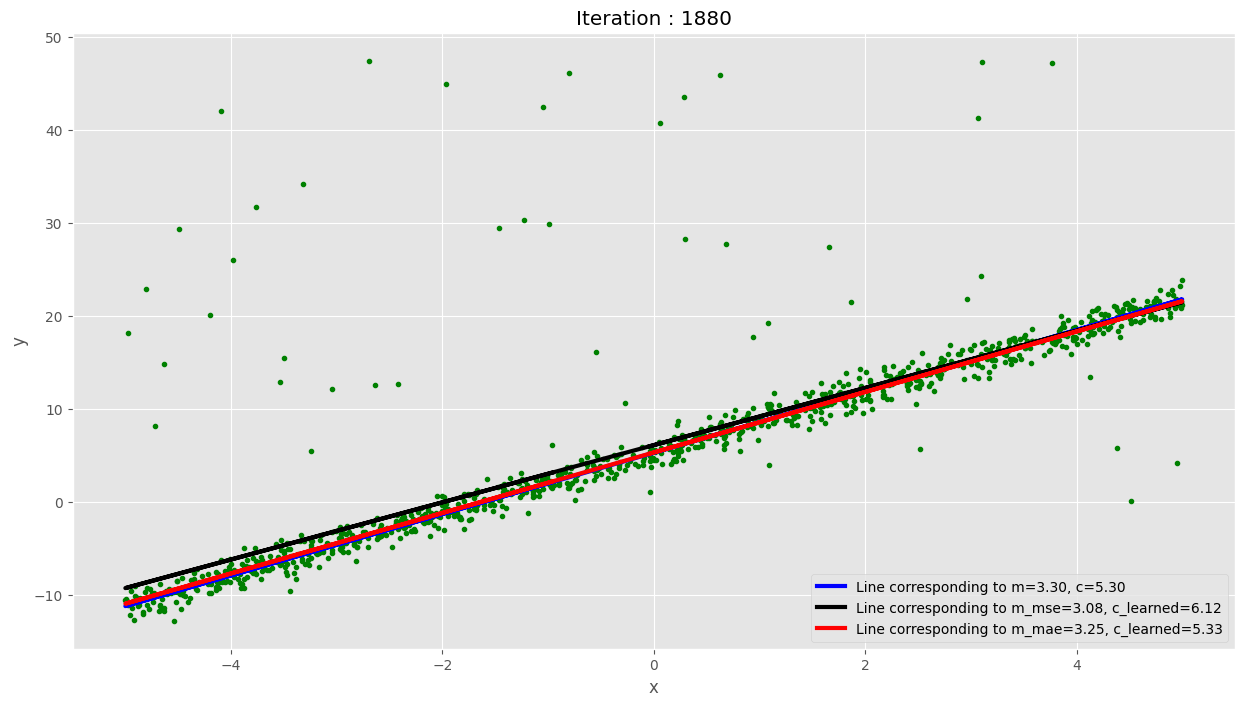

Iteration: 1900, 
Loss_mse: 33.736, m_mse: 3.204, c_mse: 5.982
Loss_mae: 1.835, m_mae: 3.274,c_mae: 5.322


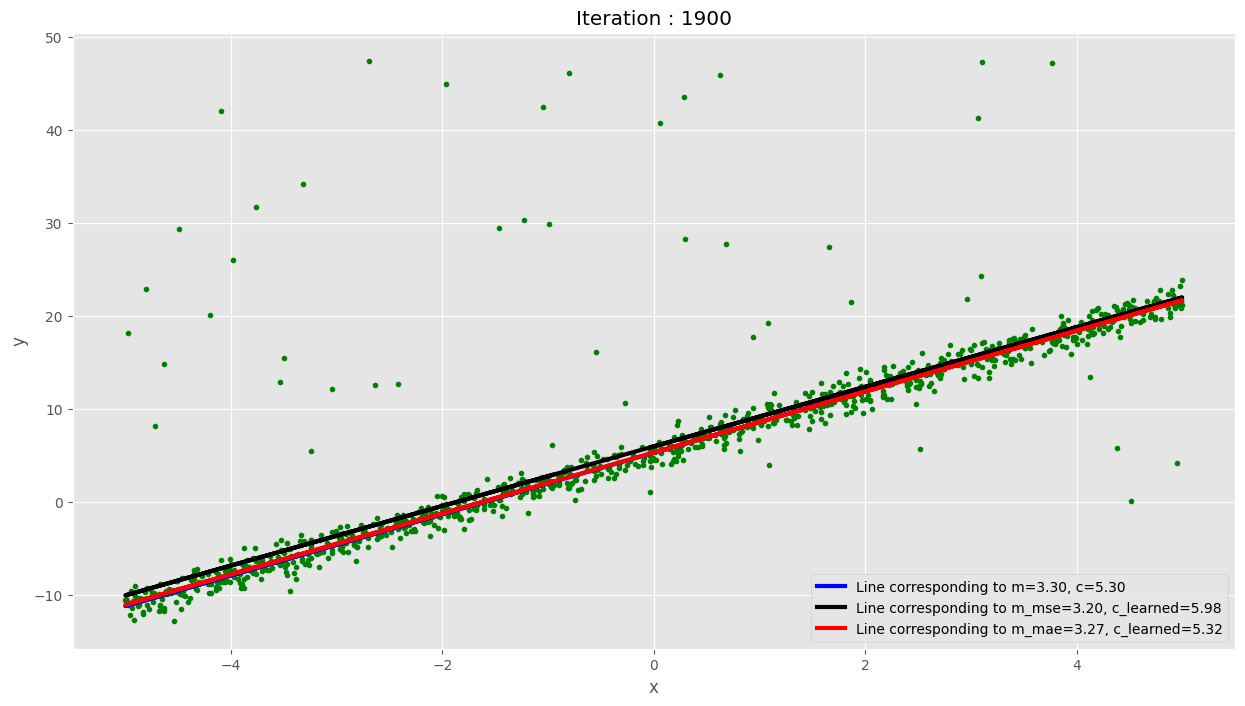

Iteration: 1940, 
Loss_mse: 33.584, m_mse: 2.981, c_mse: 6.032
Loss_mae: 1.835, m_mae: 3.283,c_mae: 5.301


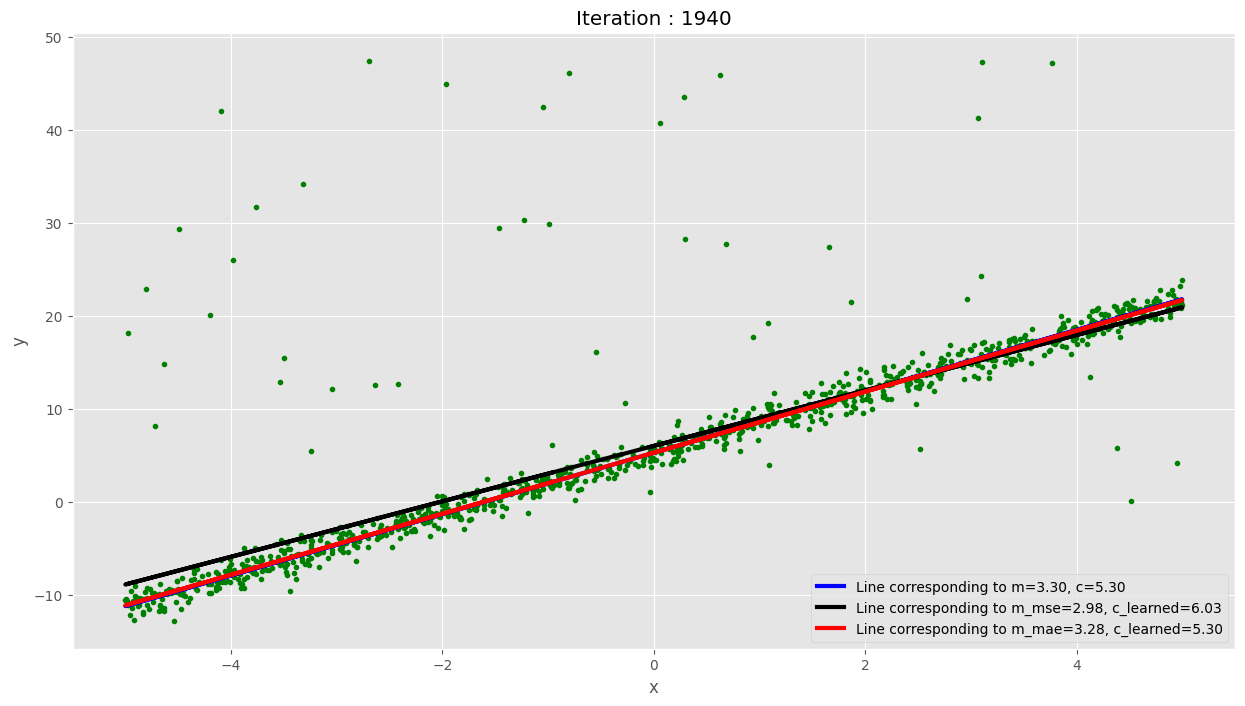

Iteration: 1980, 
Loss_mse: 33.573, m_mse: 3.025, c_mse: 5.973
Loss_mae: 1.835, m_mae: 3.280,c_mae: 5.313


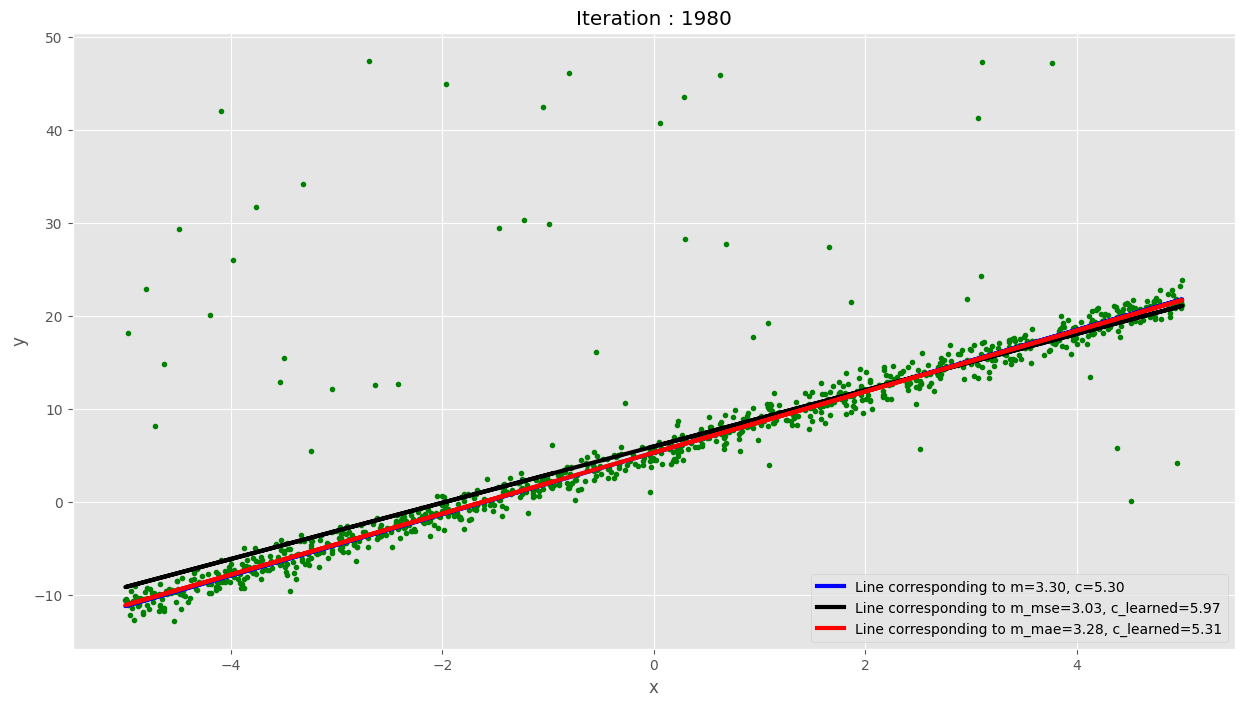

In [43]:
# inputs
inputs = x

# output/labels
labels = y_label

# labels around y
labels_origin = y

# epoch 
epoch=20

# learning rate
lr = 0.005

# batch size
batch_size=10

# dislpay plot count
display_count=40

# inital m
initial_m = 2

# initail c
initial_c = 1

grad_fun_m_c_list = [gradient_wrt_m_and_c_mse, gradient_wrt_m_and_c_mae]

loss_fun_list = [MSE_loss, MAE_loss]

m, c, loss, final_iteration = train(inputs, labels, labels_origin, initial_m, initial_c, grad_fun_m_c_list, 
                                    loss_fun_list, lr, batch_size, epoch, display_count)

--------------------------
Final plots
--------------------------
Iteration: 1999, 
Loss_mse: 33.598, m_mse: 2.959, c_mse: 6.077
Loss_mae: 1.835, m_mae: 3.283,c_mae: 5.317


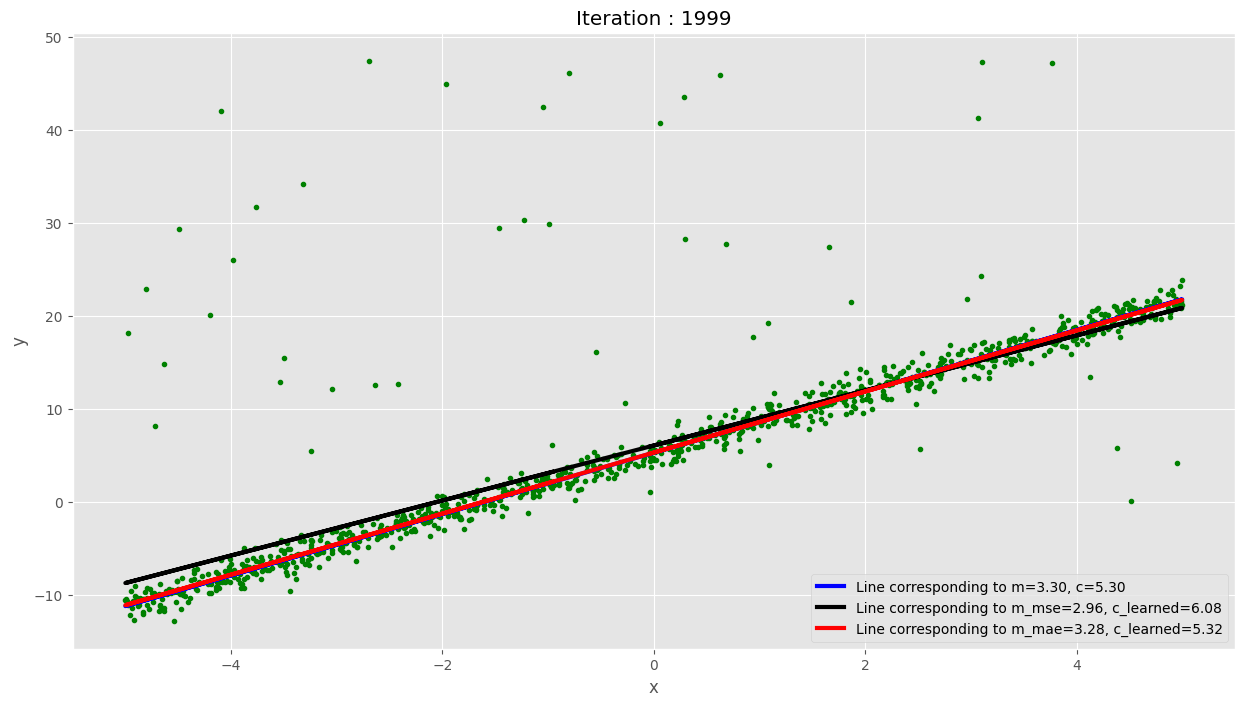

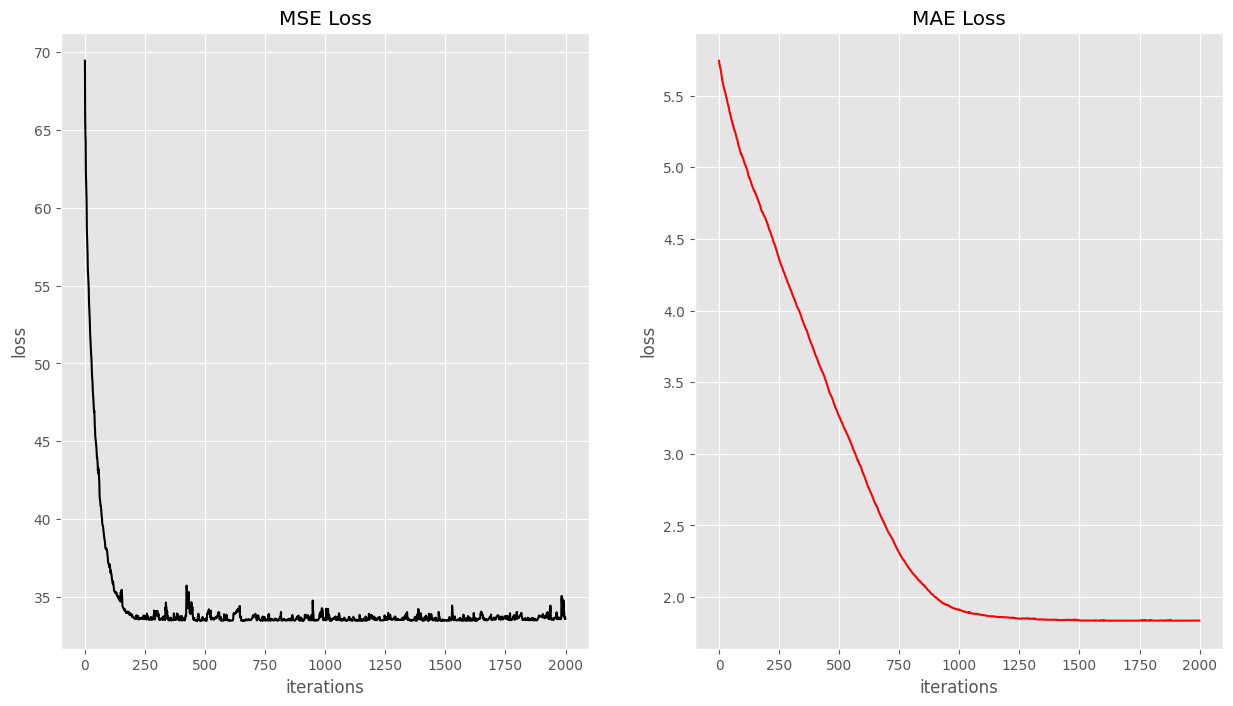

In [44]:
print('{0}\nFinal plots\n{0}'.format('--------------------------'))

display_training(inputs, labels_origin, labels, loss, m, c, iteration=final_iteration)

plot_loss(loss)


**In the above plot, we can observe that the line learned with mean square error deviated more compare to mean absolute error.**